<a href="https://colab.research.google.com/github/kcast03/DataScienceCustomerPersonalityAnalysis/blob/main/notebook_thirdDeliverable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install numpy pandas matplotlib.pyplot seaborn  --upgrade --quite

#!pip install plotly --upgrade

# **PHASE 3: DATA PRESENTATION AND VISUALIZATION**



In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Import the dataset
df = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Data Cleaning

In [ ]:
# Check for missing data
print("Missing data in the dataframe:")
print(df.isnull().sum())

Missing data in the dataframe:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


<Axes: >

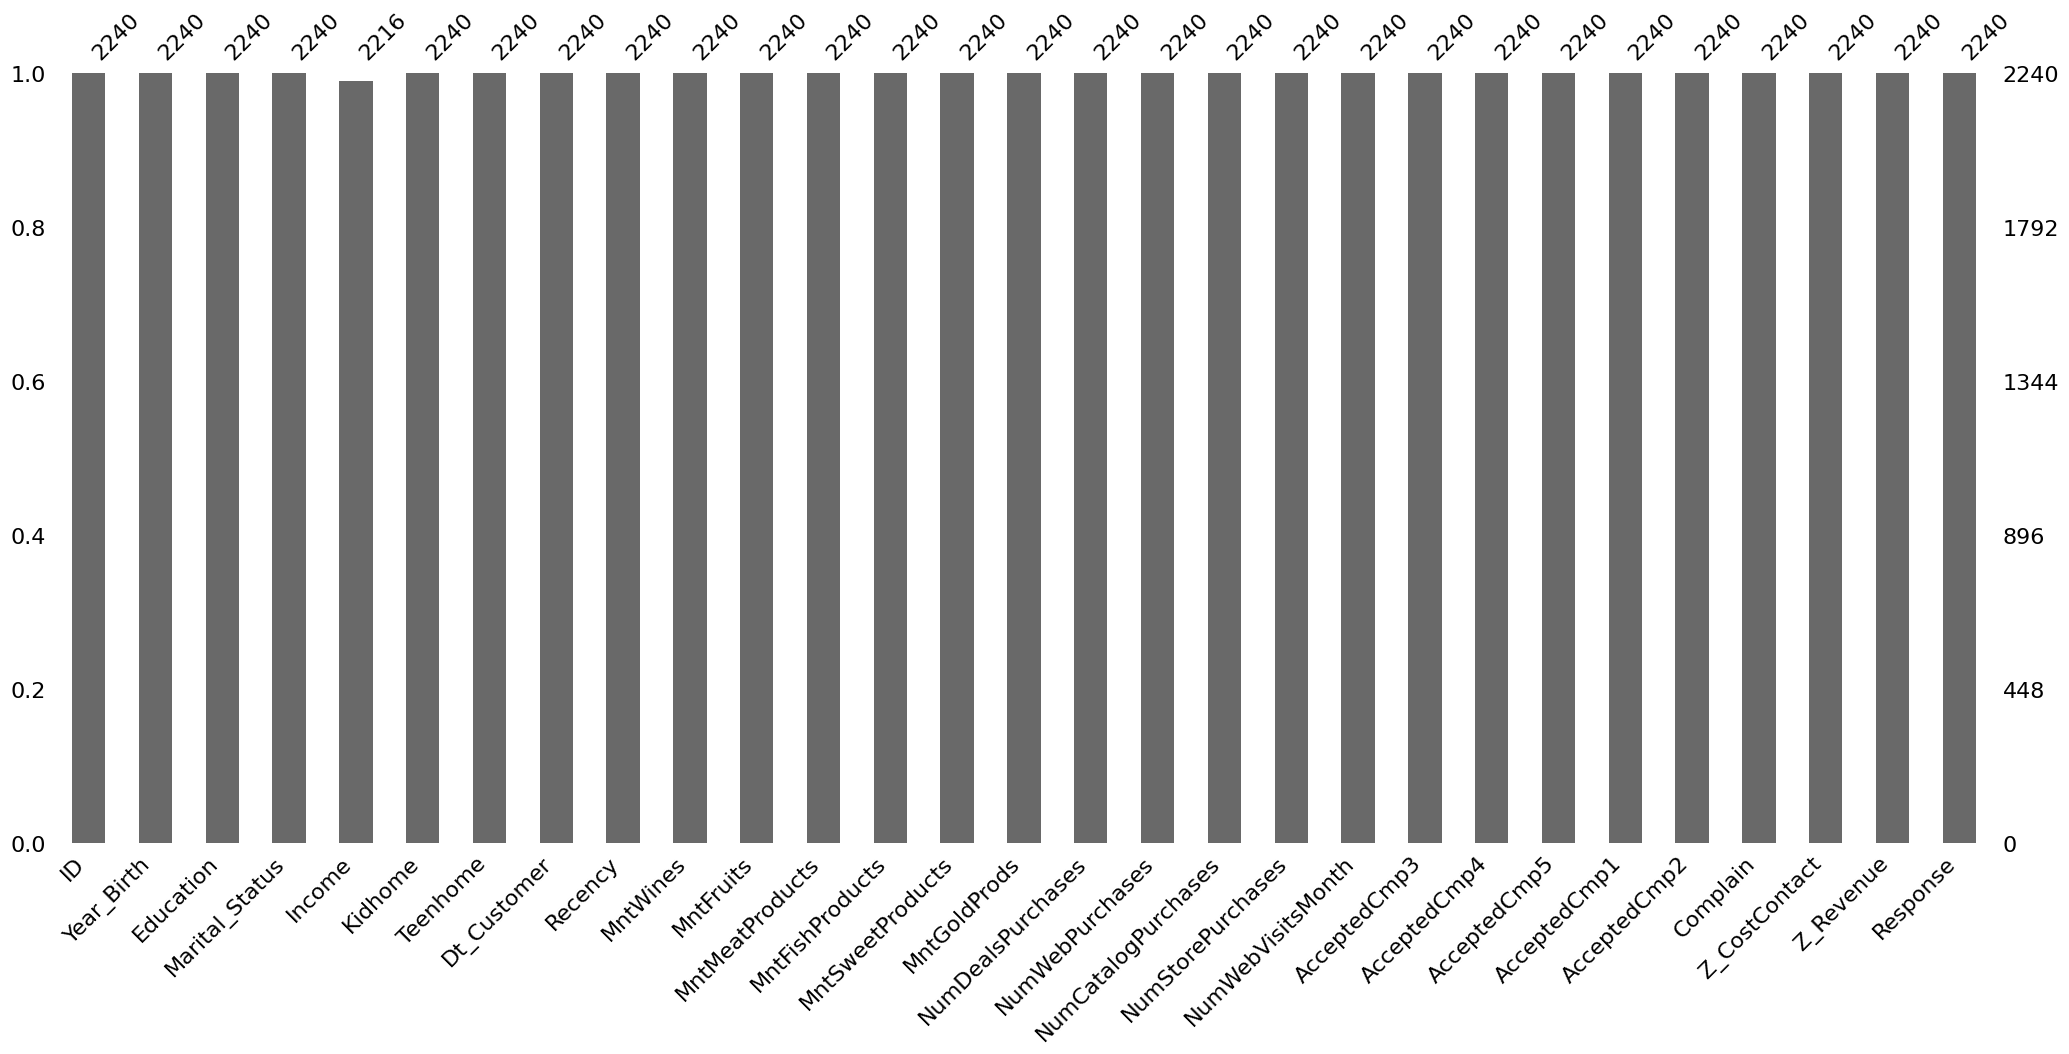

In [ ]:
# Visualize missing data

msno.bar(df)

In [ ]:
# Delete all rows with NA values of income
df = df.dropna()

Since there is only missing data in one attribute and it only contributes to less than 2% of the data, it is best to drop the values and keep accurate data.

In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# Detect outliers

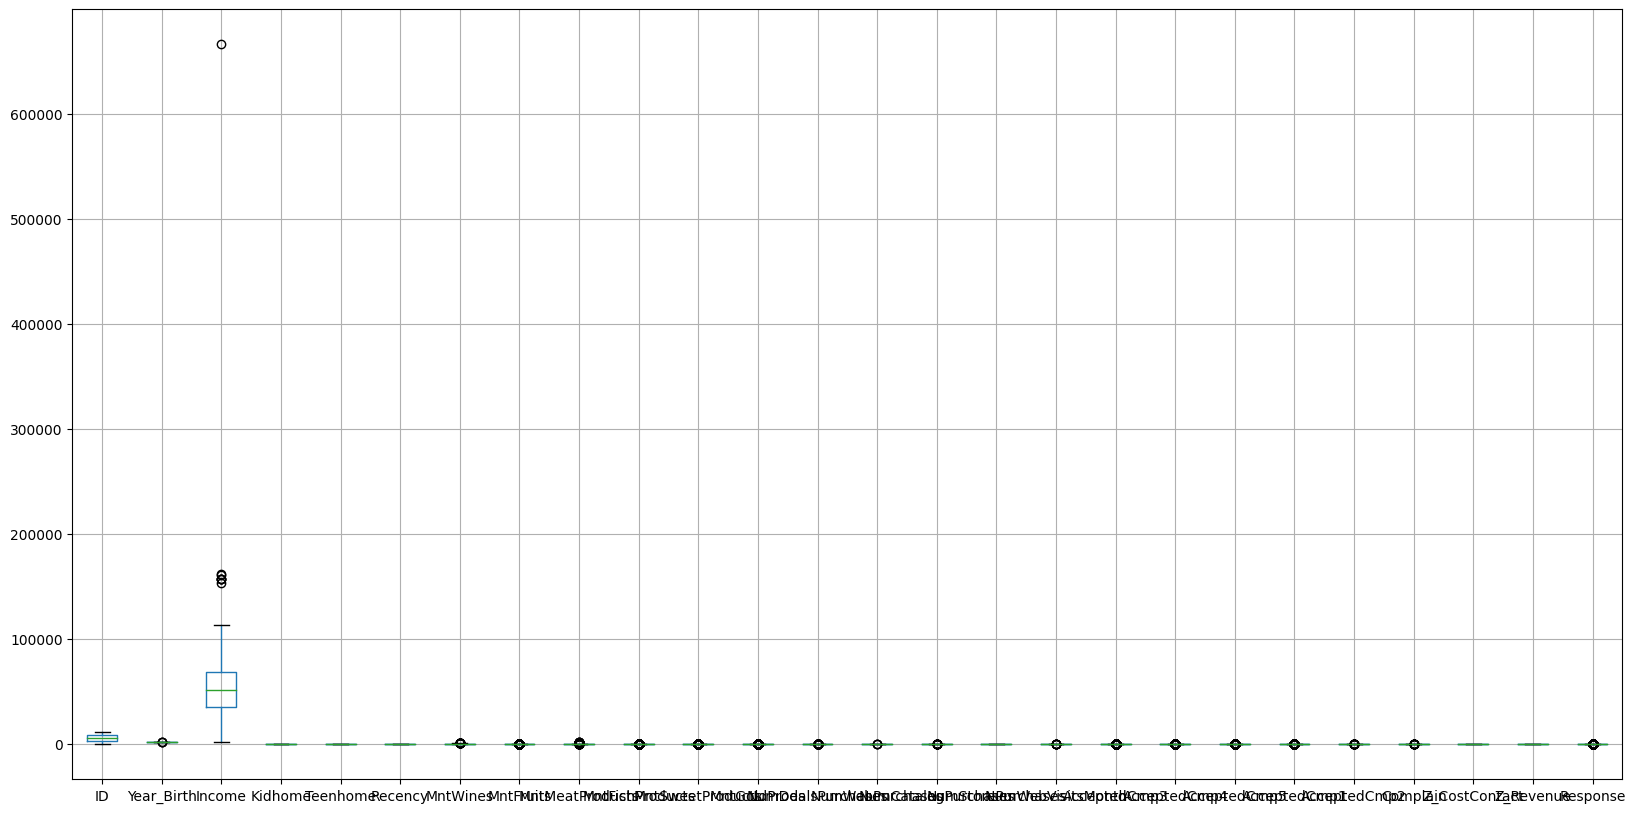

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

df.boxplot()
plt.show()

 From here we can see income is the column with most outliers

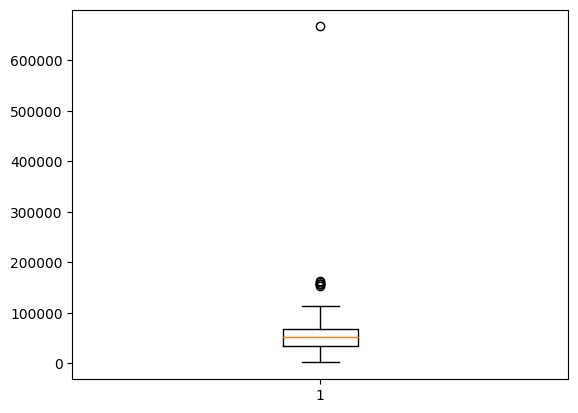

In [ ]:
# Visualize the outliers from income column
plt.boxplot(df['Income'])
plt.show()

In [ ]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Here we can see that the max value of income is way higher than the 75th percentile. This is our outlier that could mess with our model later on so it is best to delete it.


In [ ]:
df.drop(df.index[df['Income'] == df['Income'].max()], inplace = True)

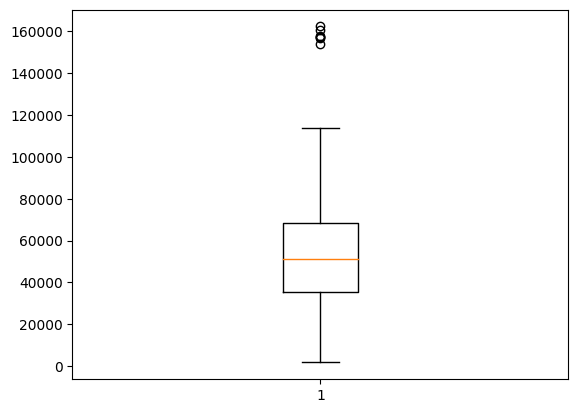

In [ ]:
# Visualize the Income column to see if we deleted outliers
plt.boxplot(df['Income'])
plt.show()

In [ ]:
# Remove unnecessary data
num_rows = len(df)

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]

    if top_pct > 0.999:
        print('{0}: {1:.2f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Z_CostContact: 100.00%
3    2215
Name: Z_CostContact, dtype: int64

Z_Revenue: 100.00%
11    2215
Name: Z_Revenue, dtype: int64



In [ ]:
# Drop columns with similar data
df = df.drop(['Z_CostContact','Z_Revenue'], axis = 1)

# Data Feature Engineering


<Axes: >

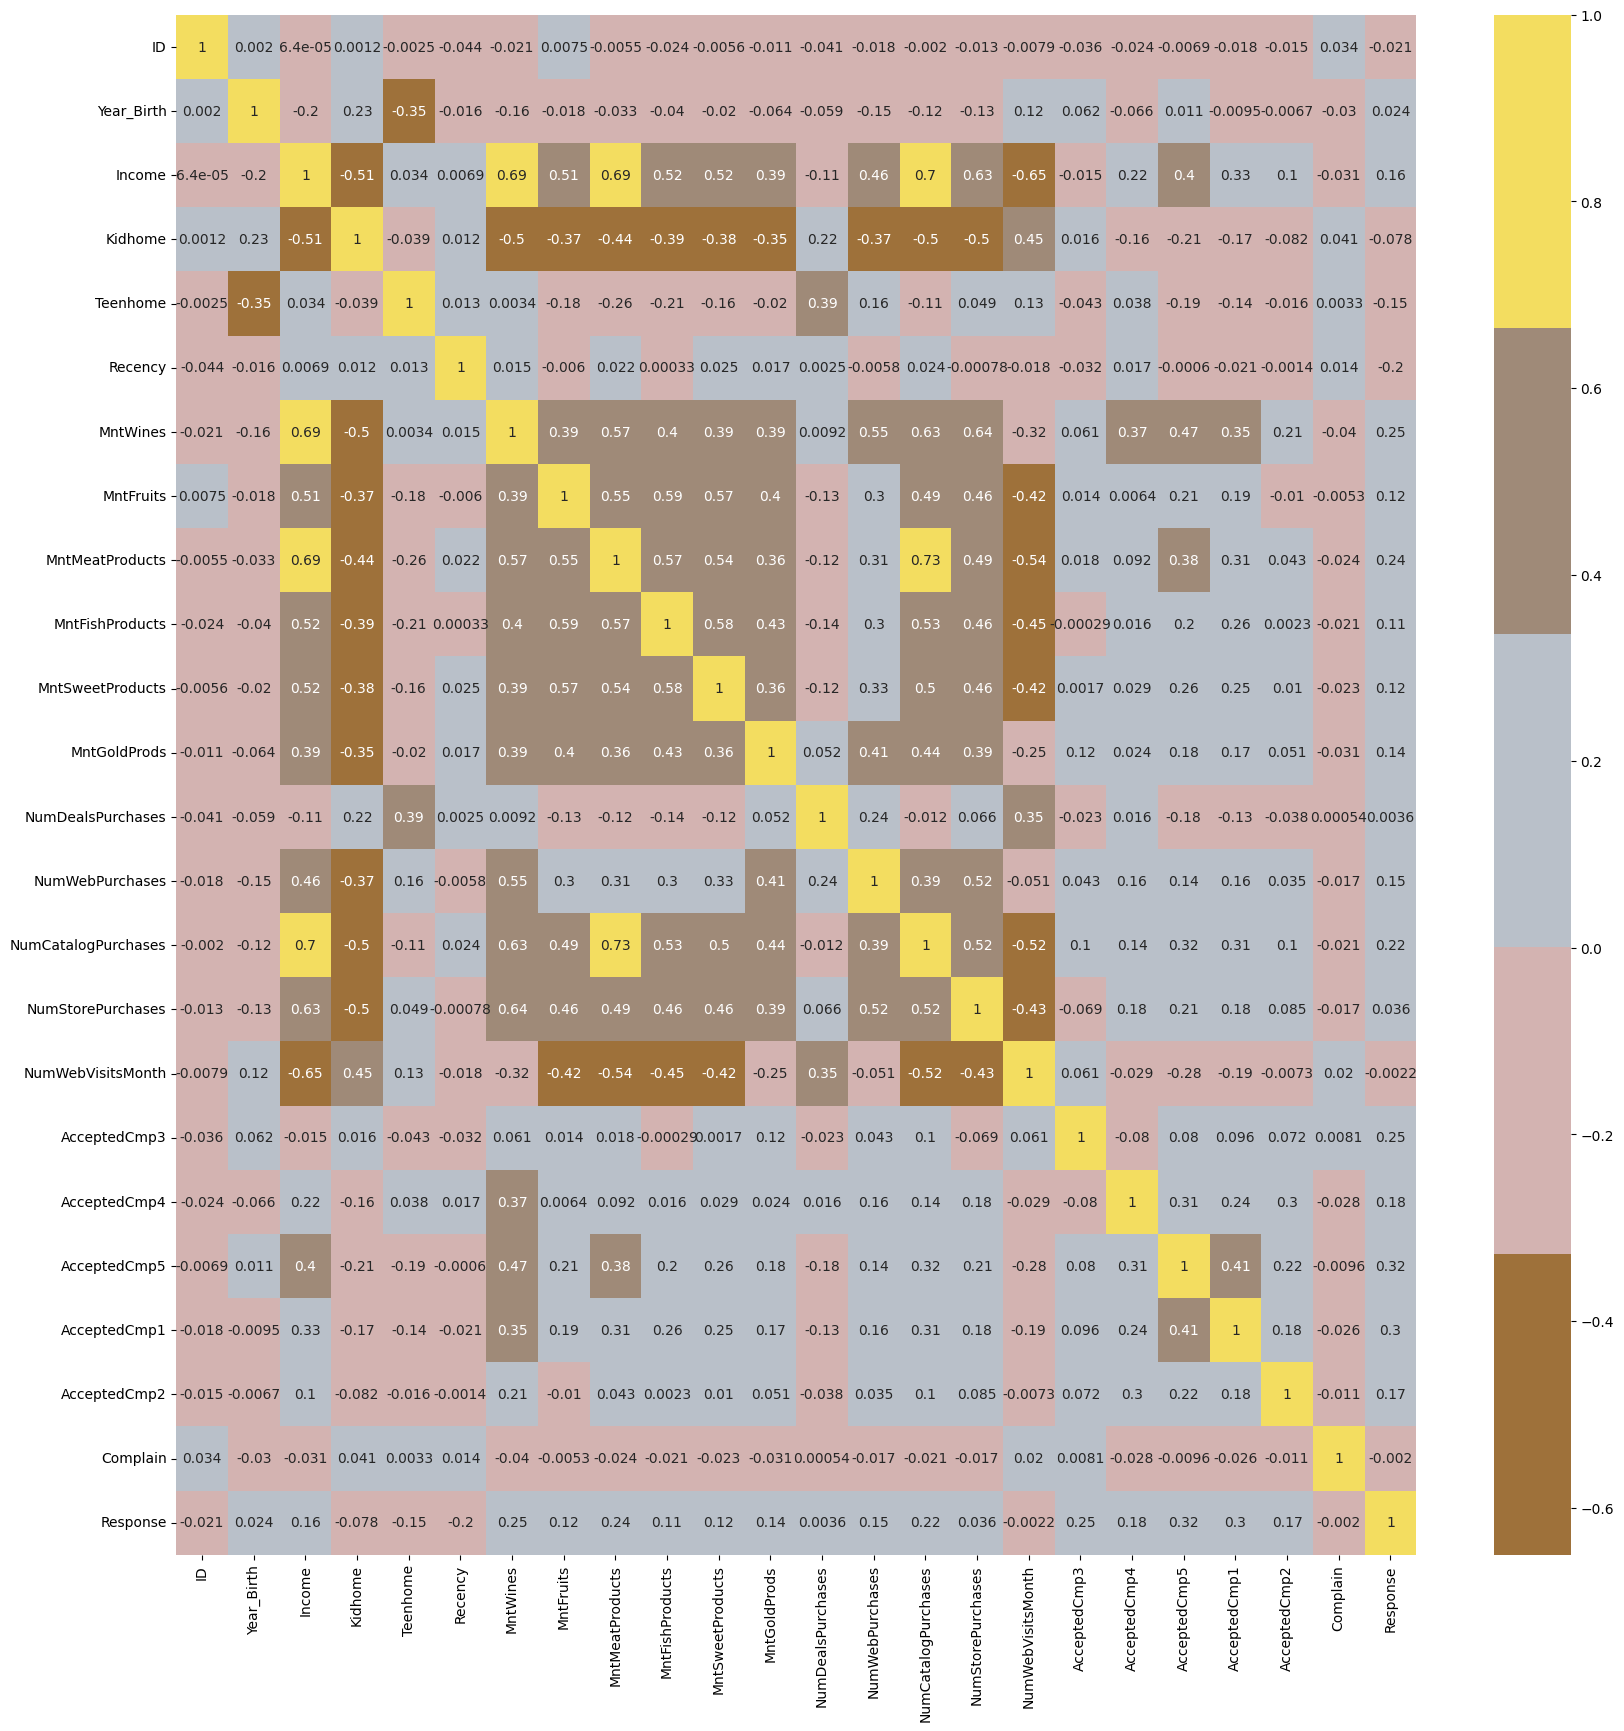

In [ ]:
pallet = ["#682F33", "#9E713A", "#D3B3B1", "#B9C0C9", "#9F8A78", "#F3DD60"]
cmap = colors.ListedColormap(pallet)
cm_plot = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_plot, annot=True, cmap =cmap, center=0)

In [ ]:
# Calculate the age from date of birth column

import datetime

today = datetime.date.today()

df['Age'] = 2015 - df['Year_Birth']

df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,31
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,34


In [ ]:
df['Age'].describe()

count    2215.000000
mean       46.183296
std        11.987000
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Age, dtype: float64

In [ ]:
# Calculate how long the customers have been with the company

import datetime
today = datetime.date.today()

#df['Dt_Customer'] =  pd.DatetimeIndex(df['Dt_Customer']).year


df['enrollment_Years'] = today.year - pd.DatetimeIndex(df['Dt_Customer']).year

<ipython-input-231-2850189854fa>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['enrollment_Years'] = today.year - pd.DatetimeIndex(df['Dt_Customer']).year


In [ ]:
# Total spent
df['Total_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [ ]:
# Combine the total number of times when the customer accepted the offer in the all campaigns.

df['NumAccepted_1st_fiveCamps'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']

# Count total number of kids and teenagers as Children
df['Children'] = df['Kidhome']+df['Teenhome']

# Calculate average spent on all different products
df['Ave_Spend_on_products']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']/6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2215 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         2215 non-null   int64  
 1   Year_Birth                 2215 non-null   int64  
 2   Education                  2215 non-null   object 
 3   Marital_Status             2215 non-null   object 
 4   Income                     2215 non-null   float64
 5   Kidhome                    2215 non-null   int64  
 6   Teenhome                   2215 non-null   int64  
 7   Dt_Customer                2215 non-null   object 
 8   Recency                    2215 non-null   int64  
 9   MntWines                   2215 non-null   int64  
 10  MntFruits                  2215 non-null   int64  
 11  MntMeatProducts            2215 non-null   int64  
 12  MntFishProducts            2215 non-null   int64  
 13  MntSweetProducts           2215 non-null   int64

In [ ]:
# Classify marital_status into 2 main categories: partner and single
df.Marital_Status = df.Marital_Status.replace({'Together': 'Partner',
                                               'Married': 'Partner',
                                               'Divorced': 'Single',
                                               'Widow': 'Single',
                                               'Alone': 'Single',
                                               'Absurd': 'Single',
                                               'YOLO': 'Single'})

<function matplotlib.pyplot.show(close=None, block=None)>

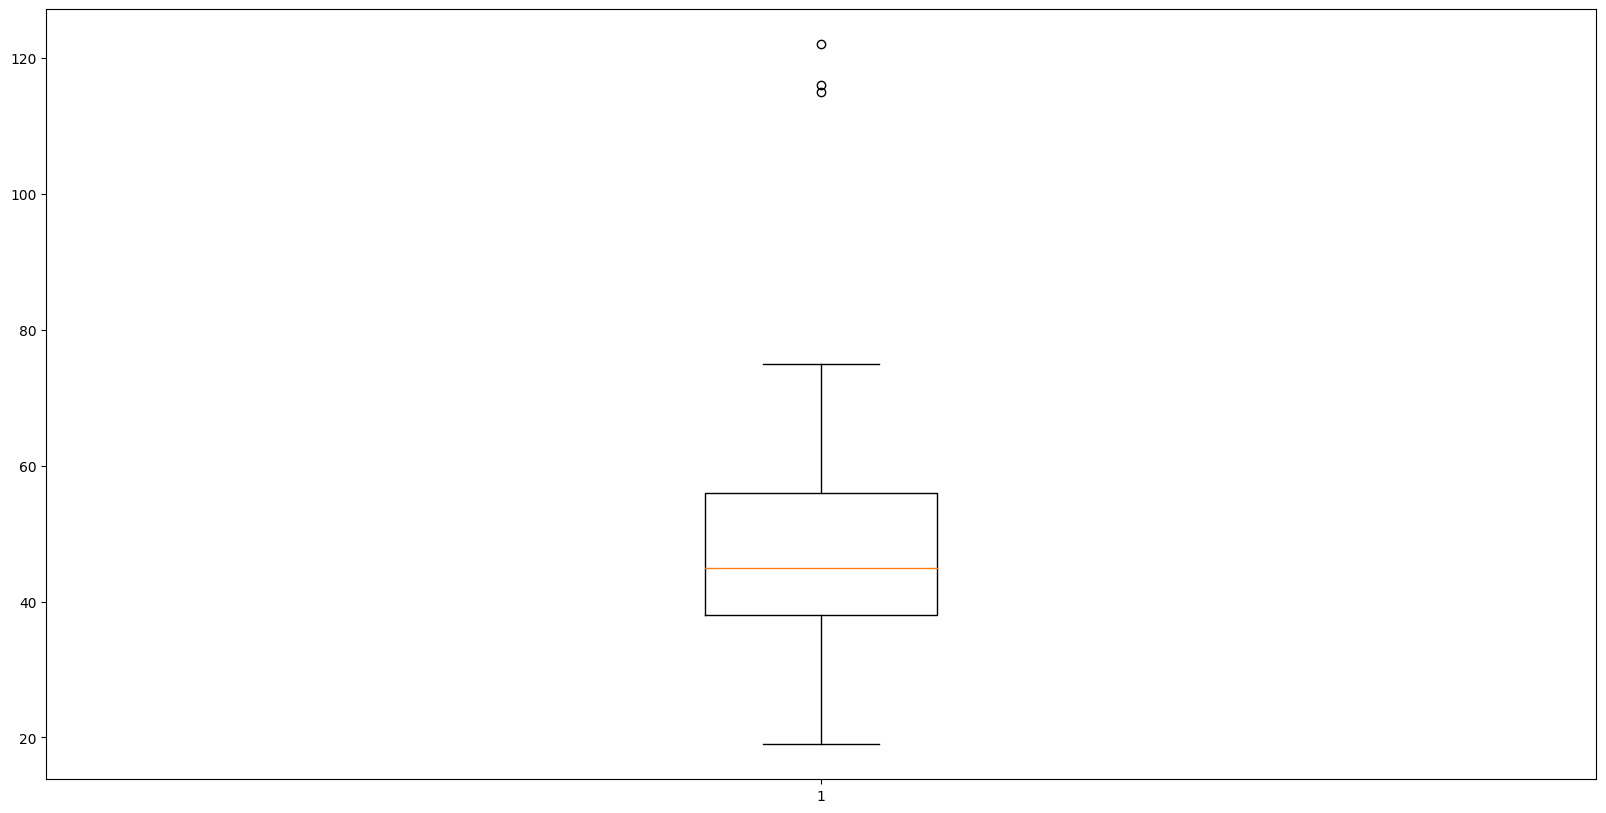

In [ ]:
# Visualize the Age column
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 10))
plt.boxplot(df['Age'])
plt.show

In [ ]:
df['Age'].describe()

count    2215.000000
mean       46.183296
std        11.987000
min        19.000000
25%        38.000000
50%        45.000000
75%        56.000000
max       122.000000
Name: Age, dtype: float64

In [ ]:
# Remove outlier in age columns (those with age greater than 80s)
df.drop(df.index[df['Age'] >80], inplace = True)

<function matplotlib.pyplot.show(close=None, block=None)>

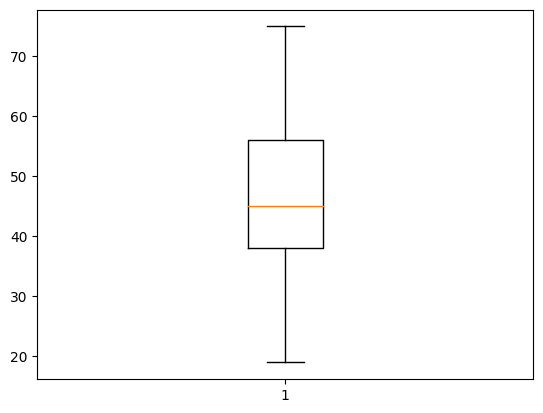

In [ ]:
plt.boxplot(df['Age'])
plt.show

In [ ]:
# Categorize Age into different age groups
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'AgeGroup'] = 'Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df.loc[(df['Age'] > 60), 'AgeGroup'] = 'Senior Adult'

In [ ]:
group = pd.cut(df['Age'], [13, 20, 39, 59, 80])

# **ANALYSIS OF CUSTOMER'S SPENT ON PRODUCTS BY PERSONALITY**

<ipython-input-242-2ed5794545e0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  products_vs_incomegroup["Income Group"] = pd.cut(products_vs_incomegroup['Income'], [0, 15000, 30000, 45000, 60000, 75000, 100000, 150000, 180000])


(-1.25, 1.25, -1.25, 1.25)

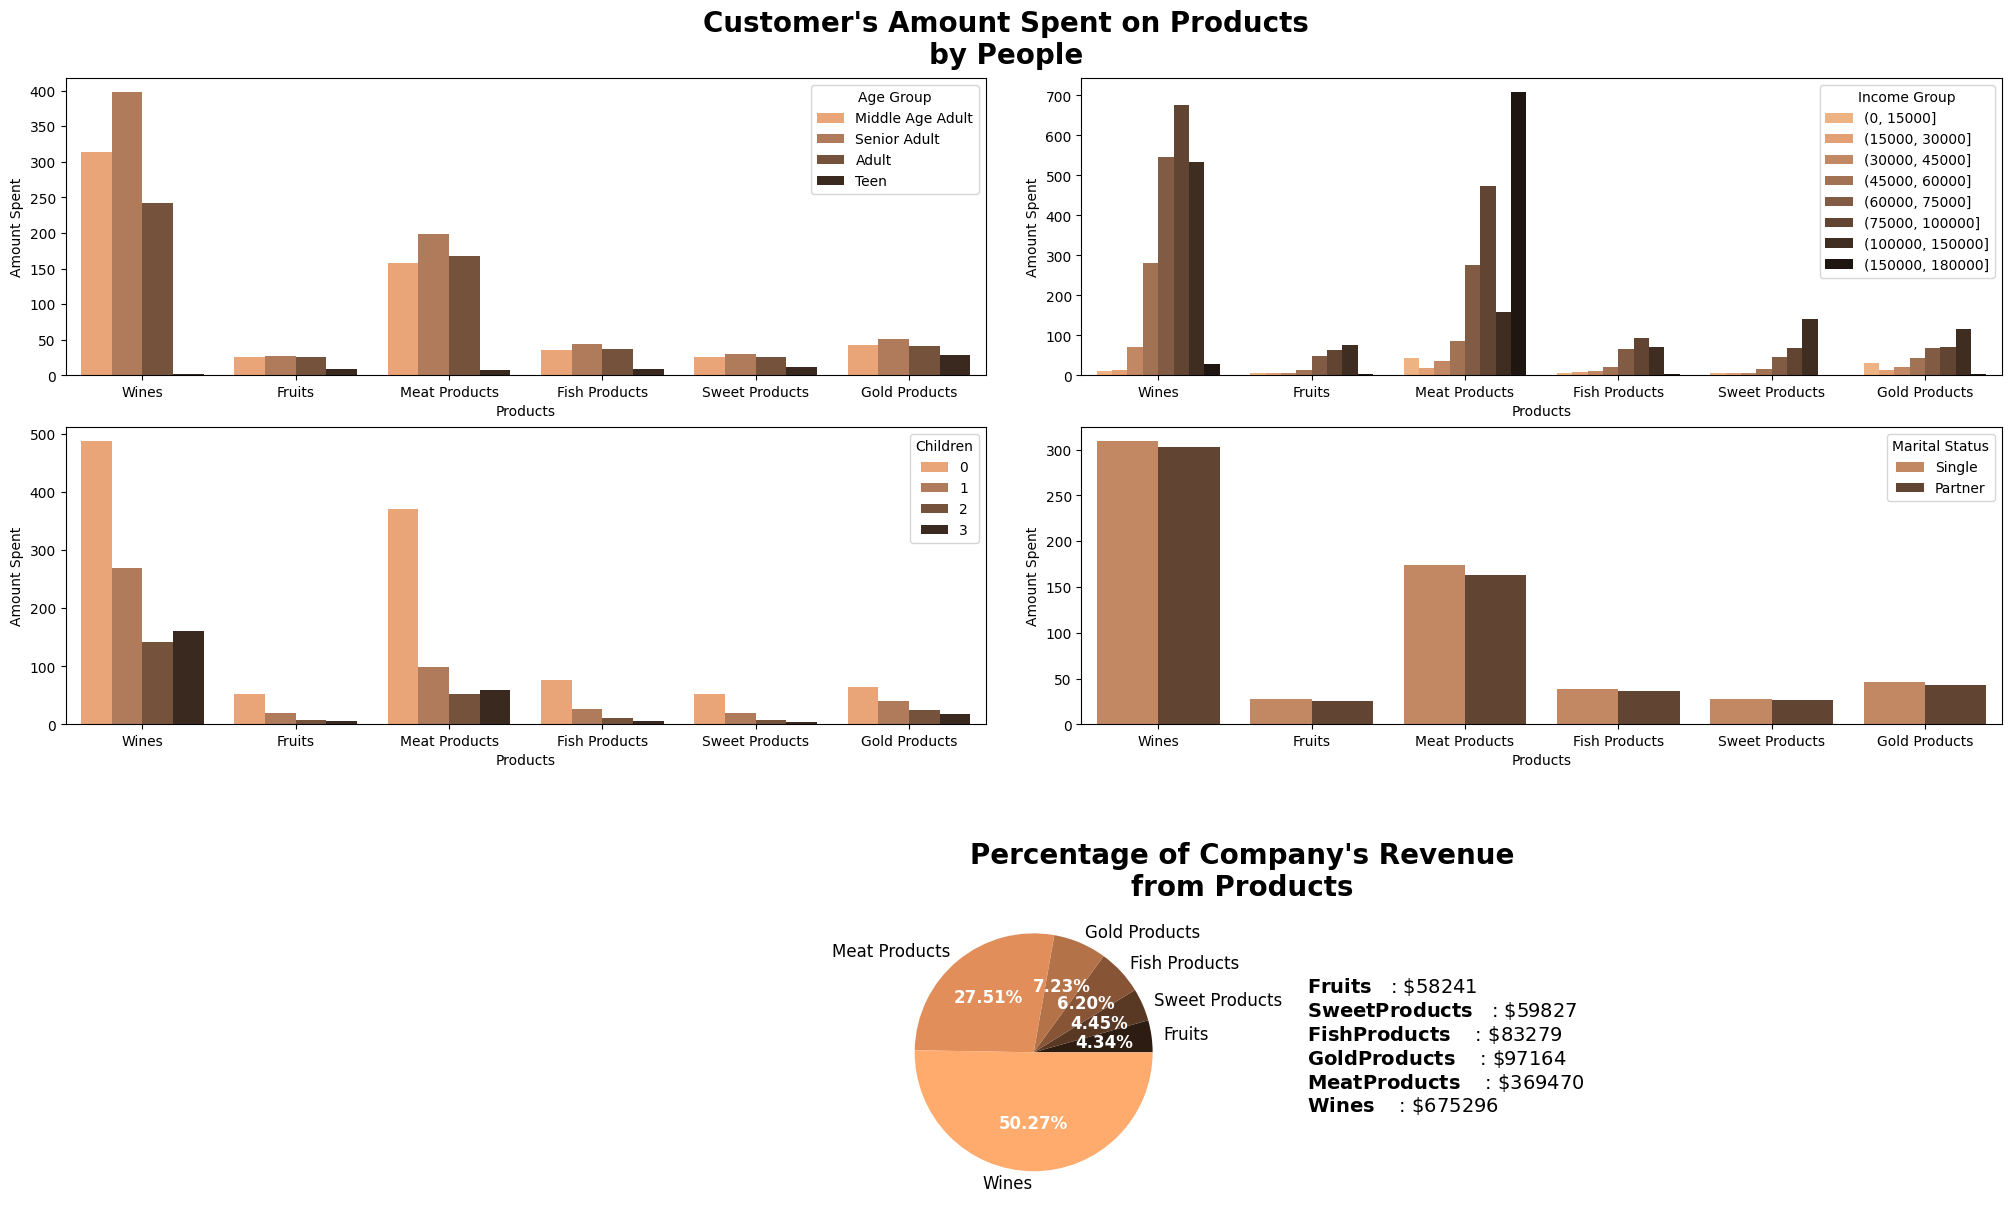

In [ ]:
palette = sns.color_palette('copper')
x = [['A panel', 'B panel'],
     ['C panel', 'D panel',],
     ['E panel', 'E panel']]

fig, axd = plt.subplot_mosaic(x,
                              constrained_layout=True,
                              figsize=(20,12))

fig.suptitle("Customer's Amount Spent on Products\nby People", weight='bold', fontsize=20)
df.rename(columns={'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat Products','MntFishProducts': 'Fish Products', 'MntSweetProducts': 'Sweet Products',
                                'MntGoldProds': 'Gold Products', 'AgeGroup': 'Age Group', 'Marital_Status': 'Marital Status'}, inplace = True)
products_vs_age = df[["Wines", "Fruits", "Meat Products", "Fish Products", "Sweet Products", "Gold Products", "Age Group"]]

products_vs_age_melt = products_vs_age.melt(id_vars = "Age Group")
products_vs_incomegroup = df[["Wines", "Fruits", "Meat Products", "Fish Products", "Sweet Products", "Gold Products", "Income"]]
products_vs_incomegroup["Income Group"] = pd.cut(products_vs_incomegroup['Income'], [0, 15000, 30000, 45000, 60000, 75000, 100000, 150000, 180000])
products_vs_incomegroup_melt = products_vs_incomegroup.melt(id_vars = "Income Group", value_vars=["Wines", "Fruits", "Meat Products", "Fish Products",
                                                                                                  "Sweet Products", "Gold Products"])
products_vs_children = df[["Wines", "Fruits", "Meat Products", "Fish Products", "Sweet Products", "Gold Products", "Children"]]
products_vs_children_melt = products_vs_children.melt(id_vars = "Children")
products_vs_marital = df[["Wines", "Fruits", "Meat Products", "Fish Products", "Sweet Products", "Gold Products", "Marital Status"]]
products_vs_marital_melt = products_vs_marital.melt(id_vars = "Marital Status")


# Bar plot
sns.barplot(data=products_vs_age_melt, x = "variable", y = "value", hue= "Age Group", palette = 'copper_r', ci=None, ax=axd['A panel']).set(
    xlabel='Products',
    ylabel='Amount Spent'
)
sns.barplot(data=products_vs_incomegroup_melt, x = "variable", y = "value", hue="Income Group", palette = 'copper_r', ci=None, ax=axd['B panel']).set(
    xlabel='Products',
    ylabel='Amount Spent'
)
sns.barplot(data=products_vs_children_melt, x = "variable", y = "value", hue="Children", palette = 'copper_r', ci=None, ax=axd['C panel']).set(
    xlabel='Products',
    ylabel='Amount Spent'
)
sns.barplot(data=products_vs_marital_melt, x = "variable", y = "value", hue="Marital Status", palette = 'copper_r', ci=None, ax=axd['D panel']).set(
    xlabel='Products',
    ylabel='Amount Spent'
)



# Pie chart
data = df[['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']].sum().sort_values()

wedges, texts, autotexts = axd['E panel'].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd['E panel'].set_title("\n\nPercentage of Company's Revenue\nfrom Products", weight='bold', fontsize=20, x=1.2)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

#Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd['E panel'].text(2.3, 0.5-0.2*i, r"$\bf{" + name + "}$" + "\t:" + " \$" + str(value), fontsize=14)

axd['E panel'].axis('off')


In [ ]:
# Insights from graphs
# Most of the products were dominated by people over 59 years old except for the sweets and meats
# The oldest group's average spent on wines was incredibly high nearly 400 dollars
# Wines were the company's best selling product followed by meats, and golds. For wine products only, it yielded more than 675k dollars in a span of 3 years. It's 50.27% of company's income#

# **ANALYSIS OF PURCHASES MADE THROUGH DIFFERENT METHODS BY AGE GROUP**

(0.0, 1.0, 0.0, 1.0)

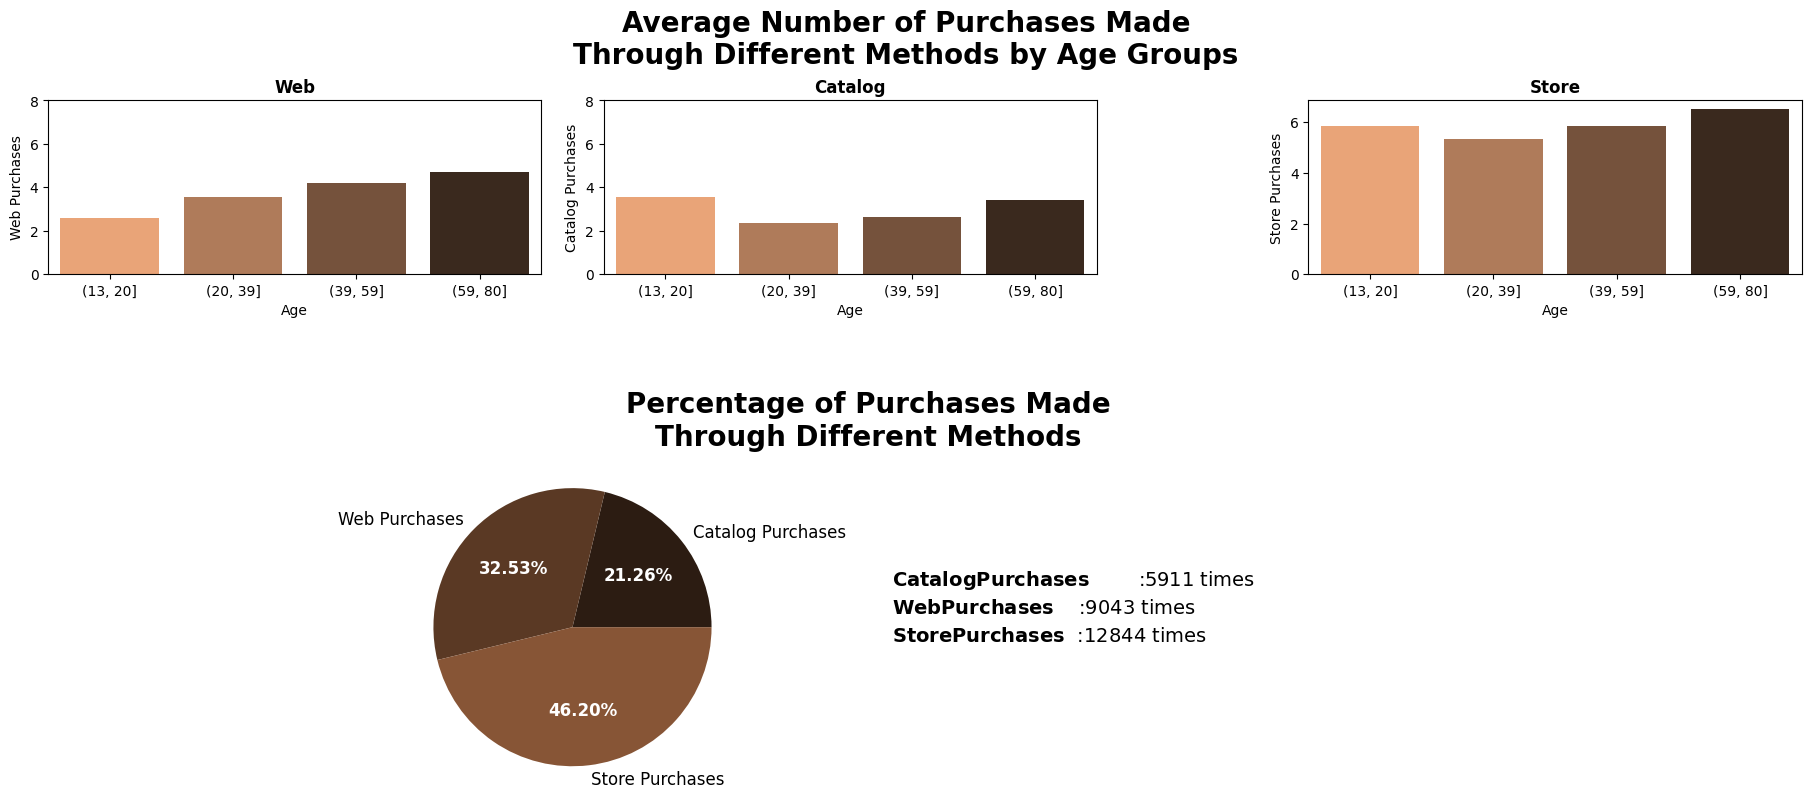

In [ ]:
fig, axd = plt.subplot_mosaic([[0,1,2], [3,3,4], [3,3,4]],
                               constrained_layout=True, figsize=(18,8))
fig.suptitle("Average Number of Purchases Made\nThrough Different Methods by Age Groups", weight='bold', fontsize=20)

custom_ylim = (0, 8)
plt.setp(axd[0], ylim=custom_ylim)
plt.setp(axd[1], ylim=custom_ylim)
df.rename(columns={'NumWebPurchases': 'Web Purchases', 'NumCatalogPurchases': 'Catalog Purchases', 'NumStorePurchases': 'Store Purchases'}, inplace = True)
# Bar plot
sns.barplot(data=df, x=group, y='Web Purchases', palette='copper_r', ci=None, ax=axd[0])
axd[0].set_title('Web', weight='bold')
sns.barplot(data=df, x=group, y='Catalog Purchases', palette='copper_r', ci=None, ax=axd[1])
axd[1].set_title('Catalog', weight='bold')
sns.barplot(data=df, x=group, y='Store Purchases', palette='copper_r', ci=None, ax=axd[2])
axd[2].set_title('Store', weight='bold')

# Pie chart
data = df[['Web Purchases', 'Catalog Purchases', 'Store Purchases']].sum().sort_values()

wedges, texts, autotexts = axd[3].pie(x=data, labels=data.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=12));
axd[3].set_title('\n\nPercentage of Purchases Made\nThrough Different Methods', weight='bold', fontsize=20, x=1.35)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')

# Text
for i, (name, value) in enumerate(zip(data.index, data)):
    axd[3].text(2.3, 0.3-0.2*i, r"$\bf{" + name + "}$" + "\t:" + str(value) + " times", fontsize=14)

axd[4].axis('off')

In [ ]:
# Insights from graphs
# Purchases made through web, and store were also dominated by people over 70 years old while purchases made through catalog were dominated by teen from 13 to 20
# It's because the number of purchases they made were higher than the rest of age groups
# A large number of successful purchases occurred directly in the store. It accounted for 46.2% of total purchases made to the company. Therefore, in store purchases is the main platform that the company should focus the marketing
# strategies on

# **ANALYSIS OF THE PERCENTAGE OF CUSTOMERS WHO ACCEPTED THE Nth OFFER**

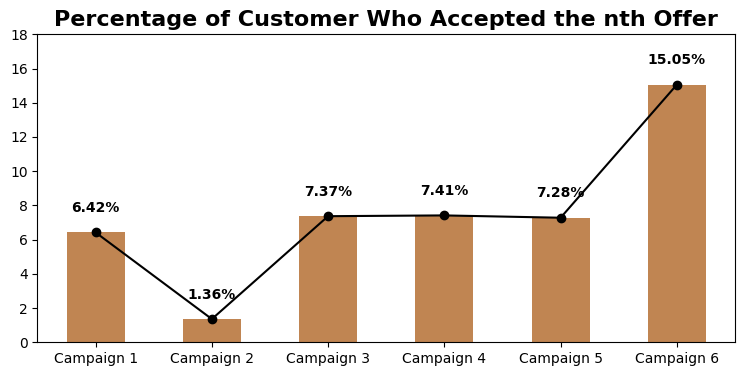

In [ ]:
df.rename(columns={'AcceptedCmp1' : 'Campaign 1', 'AcceptedCmp2' : 'Campaign 2', 'AcceptedCmp3' : 'Campaign 3', 'AcceptedCmp4' : 'Campaign 4', 'AcceptedCmp5' : 'Campaign 5', 'Response':'Campaign 6'}, inplace=True)

plt.figure(figsize=(9,4))
plt.title('Percentage of Customer Who Accepted the nth Offer', weight='bold', fontsize=16)

percent = df.sum()[['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Campaign 6']]*100/len(df)

ax = percent.plot.bar(color='#c08552')
percent.plot(style='o-', colormap='copper')

plt.setp(ax, ylim=(0, 18))

for i,v in enumerate(percent):
    plt.text(i, v+1.2, '{:.2f}%'.format(v), horizontalalignment='center', weight='bold', color='Black', fontsize=10)

In [ ]:
# Insights from graphs
# The percentage of people who directly accepted the offer in the first campaign were just 6.42%. The number became even smaller in the second campaign with just 1.36% of the customers
# The last campaign successfully drew the most customers compared to the previous campaigns with 15.05% percentage of customers

# **ANALYSIS OF THE PERCENTAGE OF PRODUCTS THAT RECEIVED COMPLAINTS AND NO COMPLAINTS**

Text(0.5, 1.0, 'Complaints')

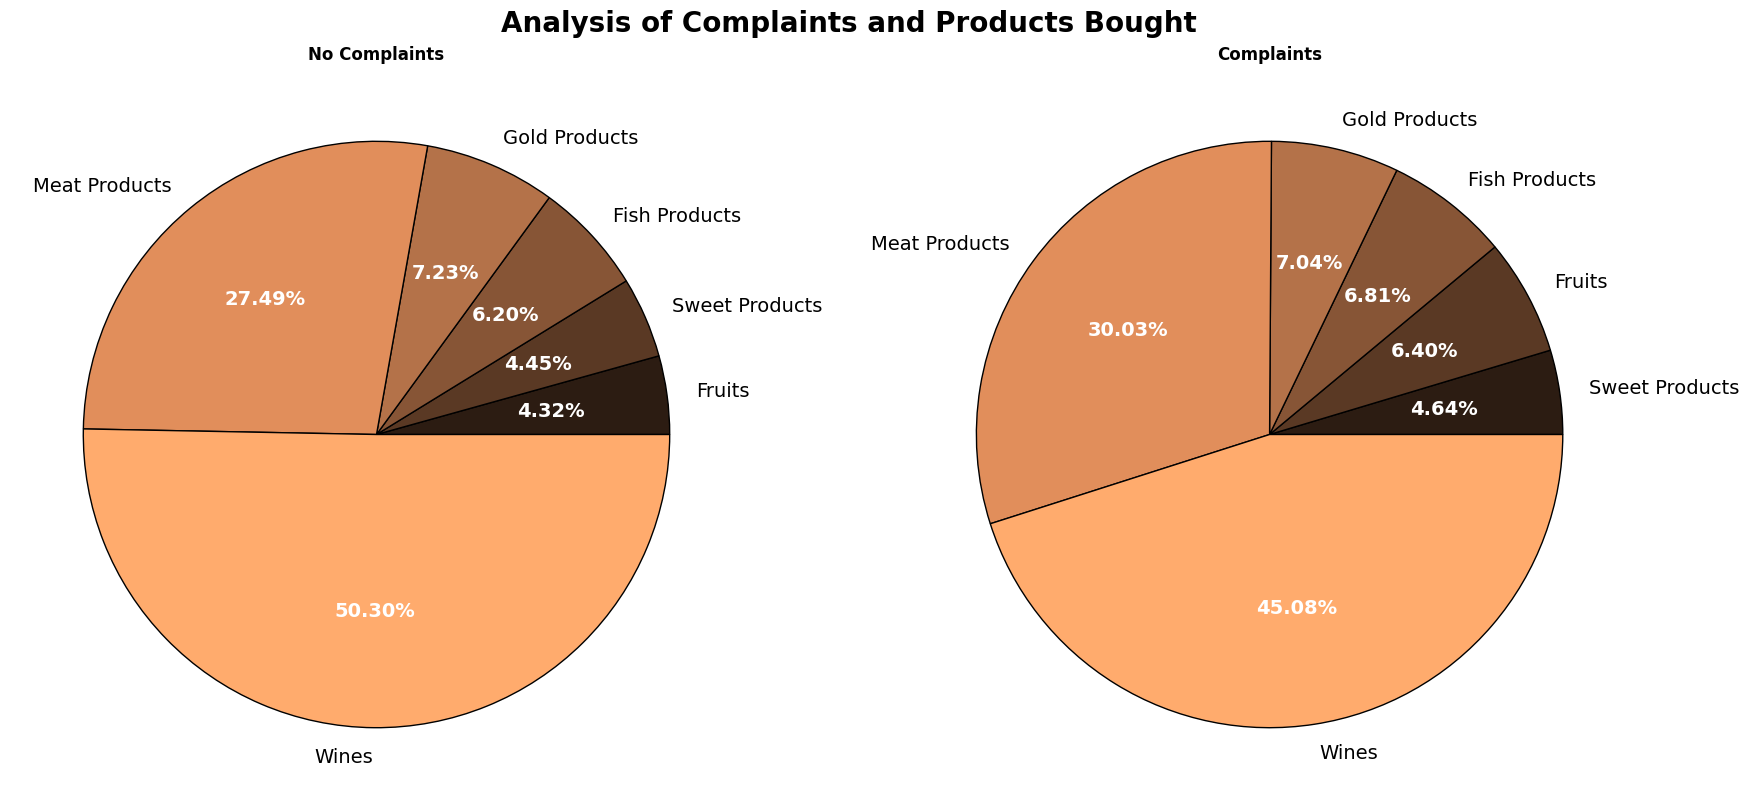

In [ ]:
df0, df1 = [x for _, x in df.groupby(df['Complain'] == 1)]

cx = [['A panel', 'B panel']]

fig, axd = plt.subplot_mosaic(cx,
                               constrained_layout=True, figsize=(18,8))

fig.suptitle("Analysis of Complaints and Products Bought", weight='bold', fontsize=20)

complain0 = df0[['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']].sum().sort_values()
complain1 = df1[['Wines', 'Fruits', 'Meat Products', 'Fish Products', 'Sweet Products', 'Gold Products']].sum().sort_values()

wedges, texts, autotexts = axd['A panel'].pie(x=complain0, labels=complain0.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=14),wedgeprops={'edgecolor':'black'});
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
wedges, texts, autotexts = axd['B panel'].pie(x=complain1, labels=complain1.index, autopct='%.2f%%', colors=palette, textprops=dict(fontsize=14),wedgeprops={'edgecolor':'black'});
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
axd['A panel'].set_title('No Complaints', weight='bold')
axd['B panel'].set_title('Complaints', weight='bold')


In [ ]:
# Display unique values in 2 columns: Education and marital_status
print("Unique values in Education column:", df['Education'].unique())
print("Unique values in Marital_Status column:", df['Marital Status'].unique())

Unique values in Education column: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Unique values in Marital_Status column: ['Single' 'Partner']


In [ ]:
df ['Education'] = df['Education'].map({'Graduation': 'Graduated', 'PhD': 'Postgraduated', 'Master': 'Postgraduated', '2n Cycle': 'Pregraduated', 'Basic': 'Pregraduated'})

In [ ]:
# Identify to be drop columns
df = df.drop(['ID','Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5', 'Kidhome', 'Teenhome', 'Wines','Fruits','Meat Products','Fish Products','Sweet Products', 'Gold Products', 'Age', 'Complain'], axis =1)

In [ ]:
# Convert categorical columns to numeric columns
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Education', 'Marital Status', 'Age Group']

encoder = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(lambda col: encoder.fit_transform(col))
df[categorical_cols].head(10)

,Education,Marital Status,Age Group
0,0,1,1
1,0,1,2
2,0,0,1
3,0,0,0
4,1,0,0
5,1,0,1
6,0,1,1
7,1,0,0
8,1,0,1
9,1,0,2


<Axes: >

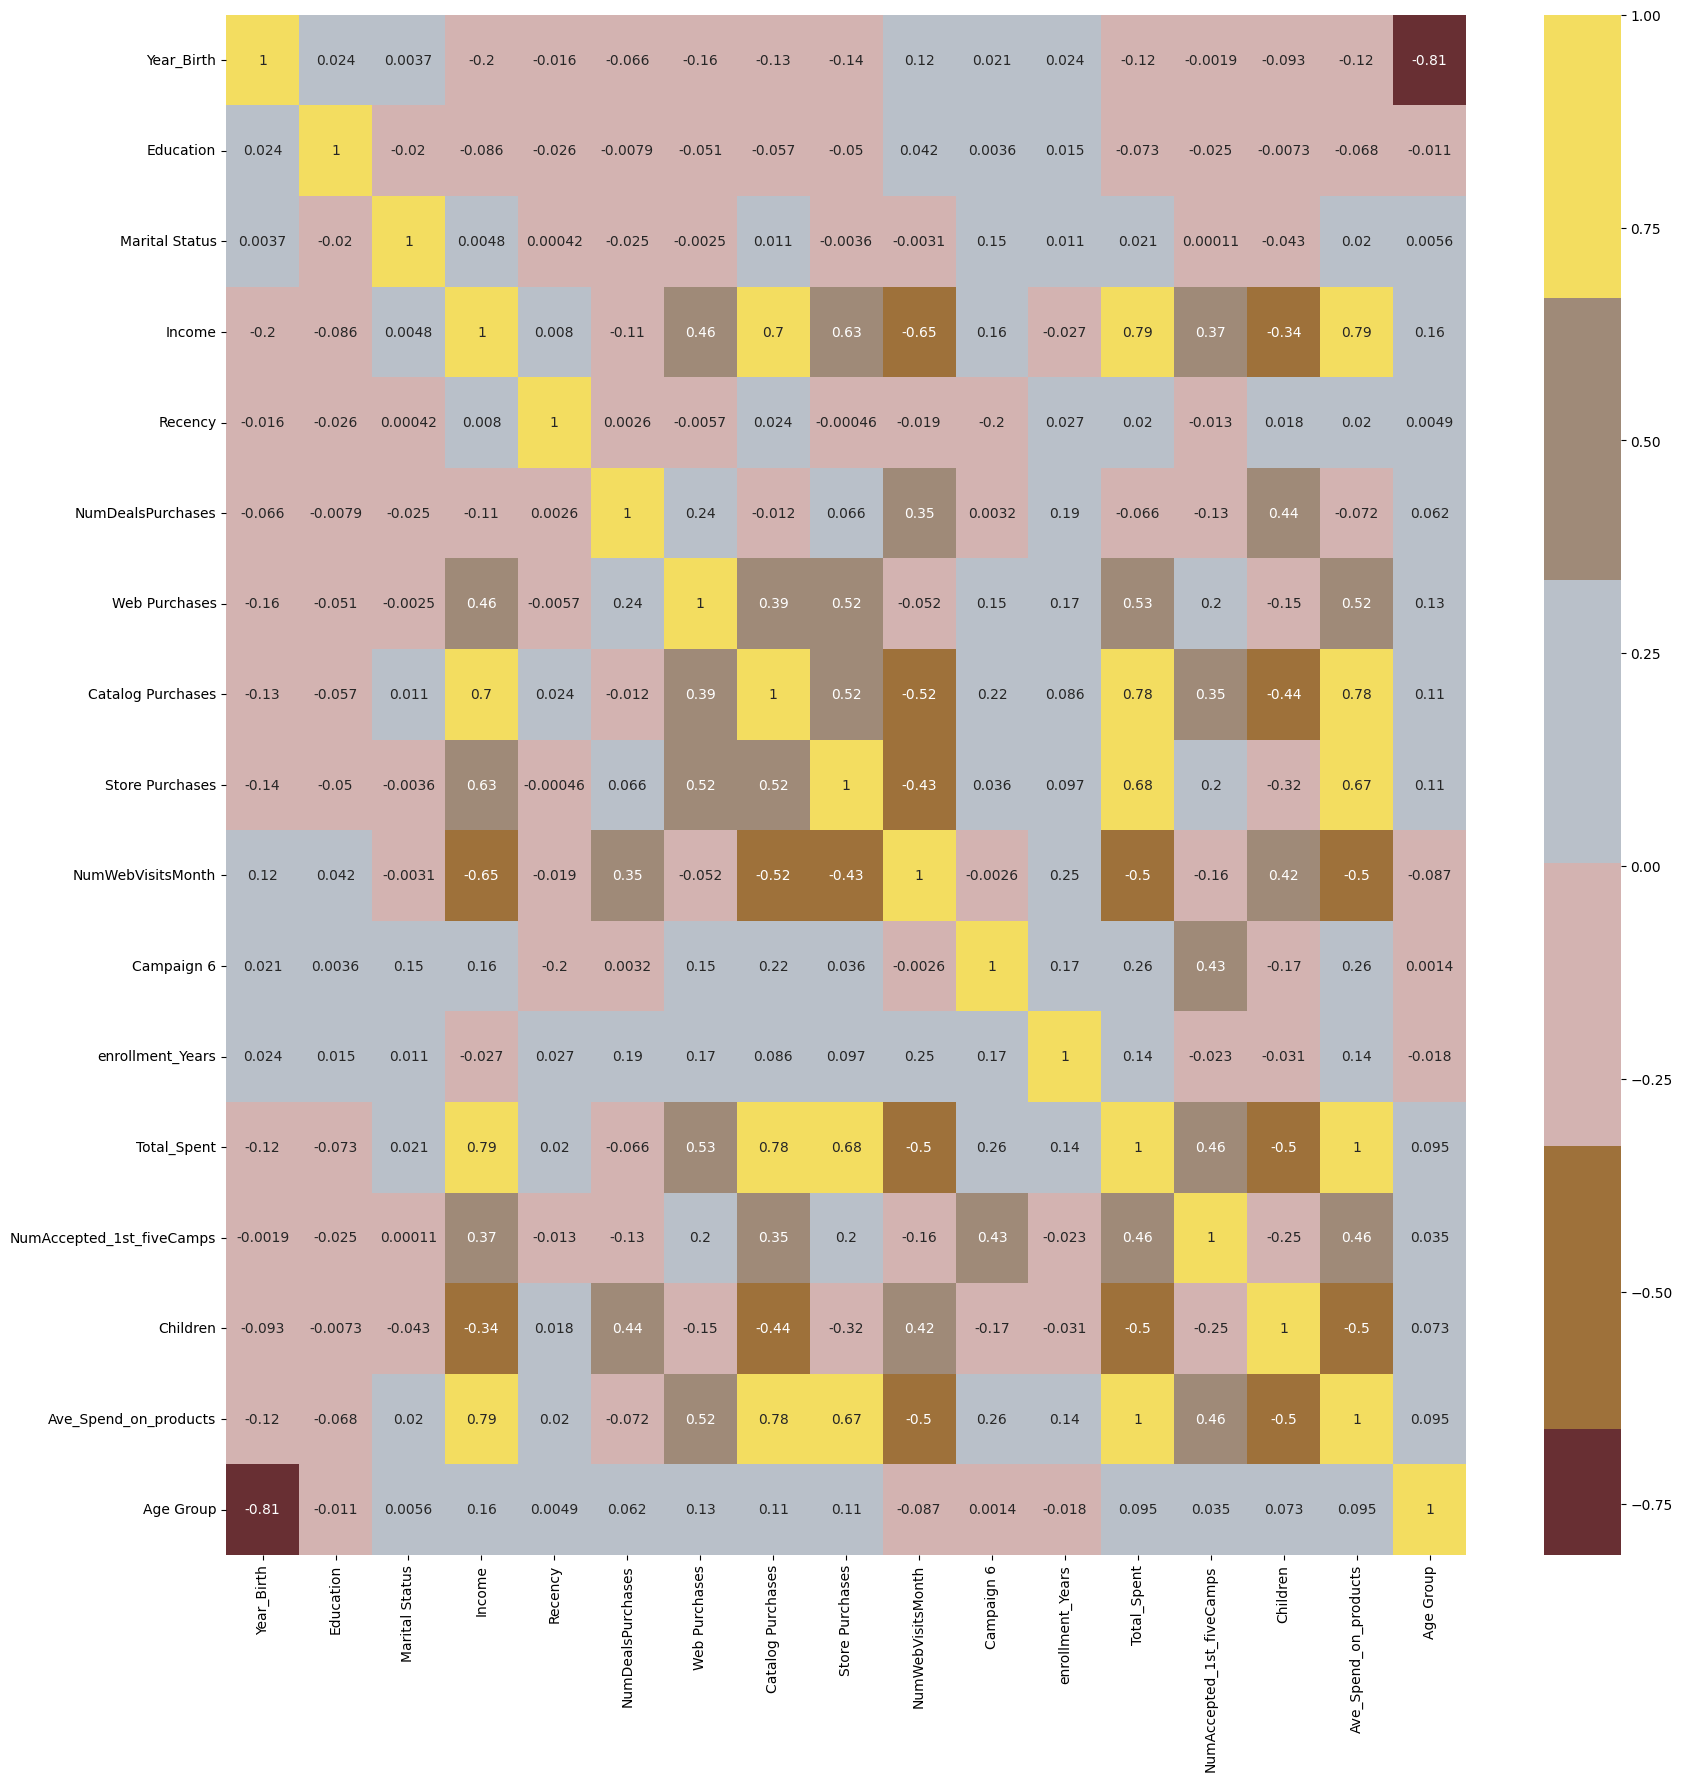

In [ ]:
pallet = ["#682F33", "#9E713A", "#D3B3B1", "#B9C0C9", "#9F8A78", "#F3DD60"]
cmap = colors.ListedColormap(pallet)
cm_plot = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cm_plot, annot=True, cmap =cmap, center=0)

In [ ]:
# Added Is_Parent column

df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x != 0 else 0)

# **FEATURE RELATIONSHIP**

Text(0.5, 1.05, 'Feature Relationship')

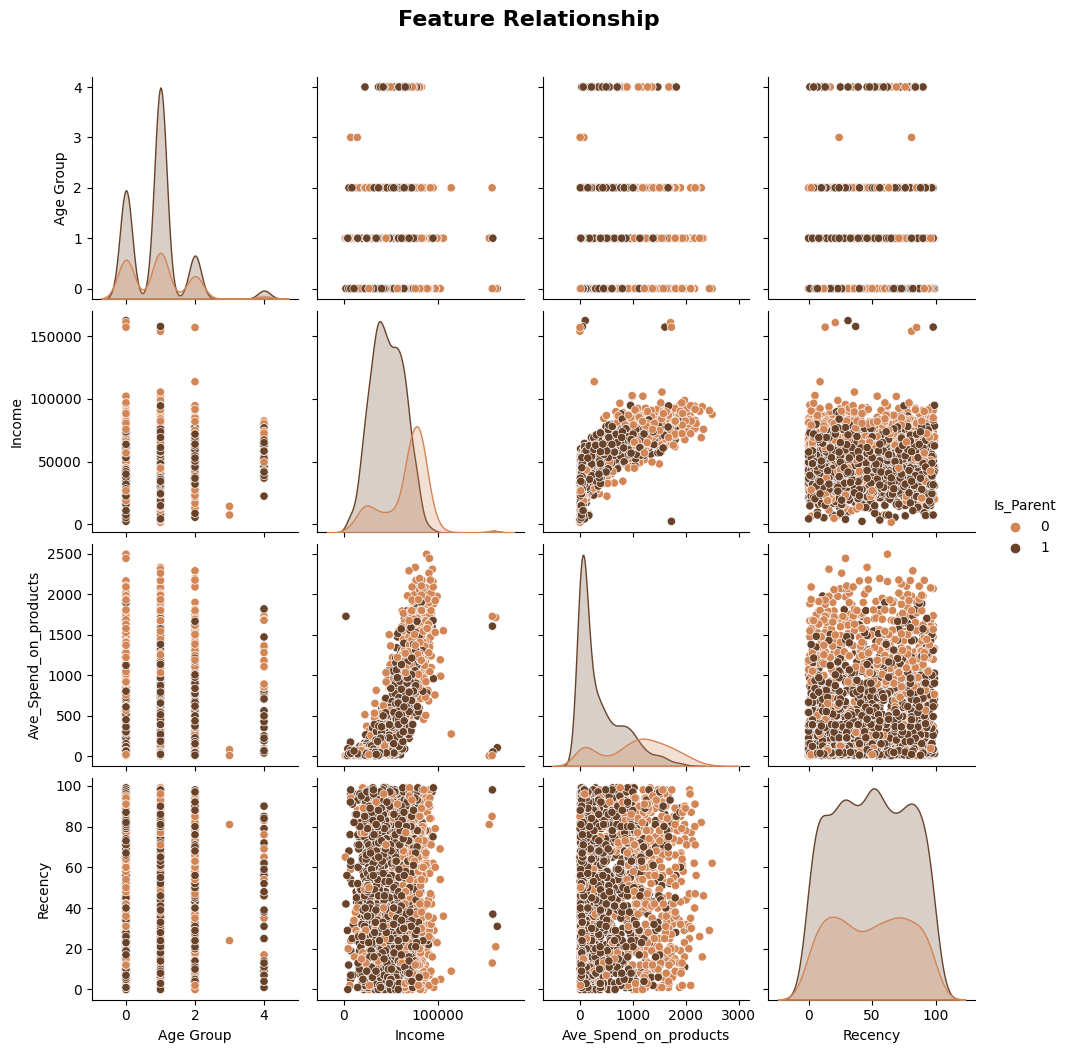

In [ ]:
data = ['Age Group', 'Income', 'Ave_Spend_on_products', 'Recency', 'Is_Parent']

plot = sns.pairplot(df[data], hue='Is_Parent', palette='copper_r')
plot.fig.suptitle('Feature Relationship', y=1.05, weight='bold', fontsize=16)

In [ ]:
# Insight from the graph
# We can see that parents expended less money on products than people who were not a parent yet
# People who had higher income were more likely to expend more on products

# **ANALYSIS OF TOTAL SPENT ON PRODUCTS BY AGE GROUPS**

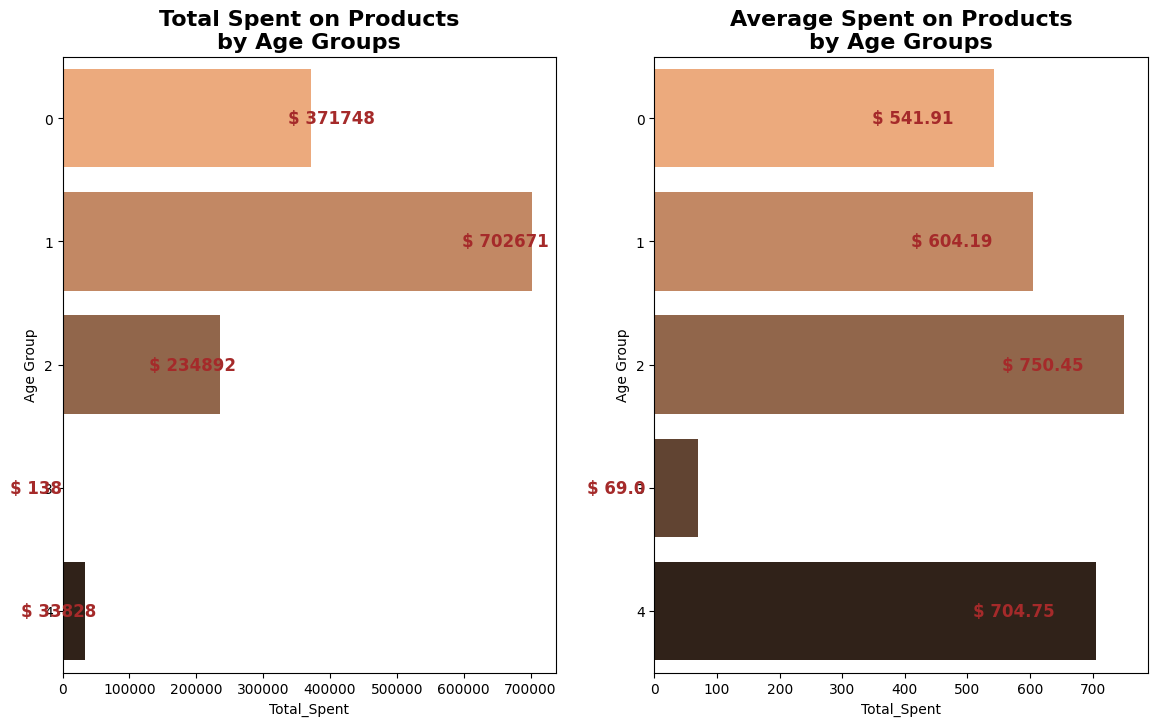

In [ ]:

sum_group = df[['Total_Spent', 'Age Group']].groupby('Age Group').sum()
mean_group = df[['Total_Spent', 'Age Group']].groupby('Age Group').mean()

fig, axes = plt.subplots(1,2,figsize=(14,8))
axes = axes.flatten()

sns.barplot(x=sum_group['Total_Spent'], y=sum_group.index, palette='copper_r', ci=None, orient='h', ax=axes[0])
axes[0].set_title('Total Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(sum_group['Total_Spent']):
    if i == 0 or i ==6:
        axes[0].text(v+30000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='brown', fontsize=12)
    else:
        axes[0].text(v-40000, i, '$ {}'.format(v), horizontalalignment='center', verticalalignment='center', weight='bold', color='brown', fontsize=12)

sns.barplot(x=mean_group['Total_Spent'], y=mean_group.index, palette='copper_r', ci=None, orient='h', ax=axes[1])
axes[1].set_title('Average Spent on Products\nby Age Groups', weight='bold', fontsize=16)

for i,v in enumerate(mean_group['Total_Spent']):
    axes[1].text(v-130, i, '$ {}'.format(round(v,2)), horizontalalignment='center', verticalalignment='center', weight='bold', color='brown', fontsize=12)

In [ ]:
#Insights from graphs

# The distribution of the data was not equal for each group. The total spent of the first group and the last group was very small (total of $172,093) comparing to those of the second and the third group (total of 1,168,970).
# That's why there was a huge contrast on total spent
# Therefore, we could focus our campaign strategies on the people of the age from 20 to 39 and 40 to 59. This would ensure the campaign will be most effective with lowest cost.
# The customers from those 2 groups are most used to shopping online so I think we can invest more resources on building a website. For example: Make the website look intriguing and attractive.
# Write a compelling copy on your web pages and keep the design innovative. Make sure that you drive the onlooker’s attention to the right places by planning the right website engagement strategies.
# Remove any obstacles or objections on this initial stage and focus on good customer experience. Even small elements such as intrusive pop-ups, disturbing ads, difficulty navigating, or lack of quick customer support can turn them away.

# Since the number of people in each group was not balanced, we can use average spent. People in the middle age tend to spent more money on products compared to the rest of the age group with more than 100 dollars,

# Age Group:
# 0 is Teen (Age <= 19)
# 1 is Adult (20 =< Age <= 39)
# 2 is Middle Age (40 =< Age <= 59)
# 3 is Seinor (Age > 60)

# **ANALYSIS OF AVERAGE NUMBER OF PURCHASES MADE WITH A DISCOUNT BY AGE GROUPS**

<Axes: title={'center': 'Average Number of Purchases Made with a Discount\nby Age Groups'}, xlabel='Age', ylabel='NumDealsPurchases'>

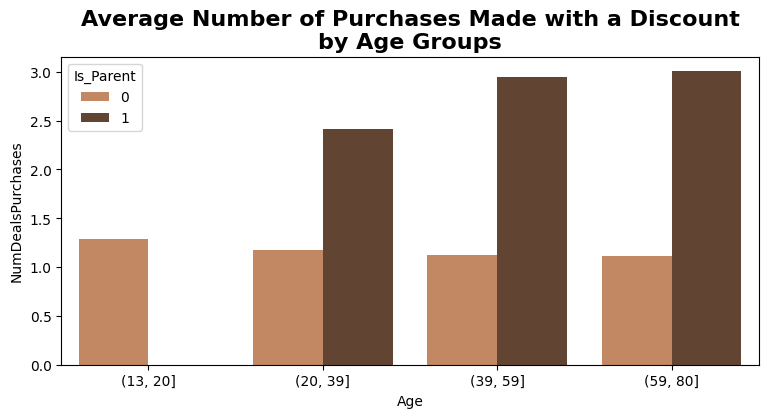

In [ ]:
plt.figure(figsize=(9,4))
plt.title('Average Number of Purchases Made with a Discount\nby Age Groups', weight='bold', fontsize=16)
sns.barplot(data=df, x=group, y='NumDealsPurchases', hue='Is_Parent', ci=None, palette='copper_r')

In [ ]:
# Insights from graphs
#Parents were the ones who were attracted more easily by discounts. It's clearly shown on the graph above where in this case the number of purchases made with a discount by parents surpassed non-parents

# **ANALYSIS OF RATE RESPONSES PER VISIT**

In [ ]:
# Response column has been renamed to AcceptedCmp6, now rename back
df.rename(columns={'Campaign 6':'Response'}, inplace=True)

df['rate'] = df['Response'] / df['NumWebVisitsMonth']
average_rate = round(df['rate'].mean(), 2)
fig = px.histogram(df, x="rate", histnorm='percent', title='Ratio of Responses per Visits')
fig.show()
print('The average rate:', average_rate*100, '%')

In [ ]:
cur_df = df.query('NumWebVisitsMonth > 0')
average_rate = round(cur_df.query('Response > 0').shape[0] / cur_df.shape[0], 2)
print('The average rate:', average_rate*100, '%')

The average rate: 15.0 %


In [ ]:
# When excluding the number of repeated visits, we got the average rate is 15.0%. This means we got 15 responses from each 100 visits

# **ANALYSIS OF WHETHER INCOME HAVE A BIG EFFECT ON THE RESPONSE RATE OR IT OUR PRODUCTS DID NOT ATTRACT THE CUSTOMERS**

In [ ]:
import plotly.graph_objects as go

In [ ]:
response = df.query('Response == 1')
non_response = df.query('Response == 0')
fig = go.Figure()
fig.add_trace(go.Violin(x=response['Income'], line_color='lightseagreen', name='Response', y0=0))
fig.add_trace(go.Violin(x=non_response['Income'], line_color='red', name= 'Don\'t response', y0=0))

fig.update_traces(orientation='h', side='positive', meanline_visible=False)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

fig.update_layout(title='<b>Income distribution (Response Vs Non-response)<b>',
                  xaxis_title='Income',
                  titlefont={'size': 18},
                  width=600,
                  height=400,
                  template="plotly_dark",
                  showlegend=True,
                  paper_bgcolor="lightgray",
                  plot_bgcolor='lightgray',
                  font=dict(
                      color ='black',
                      )
                  )
fig.update_layout(xaxis_range=[0,150000])
fig.show()

In [ ]:
# So we can see that income doesn't have a huge effect on Response and this is a good news because if Income has huge effect on Response this will mean that the products is expensive
# and many customers don't buy because of the high prices, but this doesn't happen so we have a different reason.

# **ANALYSIS ABOUT THE MOST AGE RANGE BUYING FROM OUR COMPANY**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2212 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Birth                 2212 non-null   int64  
 1   Education                  2212 non-null   int64  
 2   Marital Status             2212 non-null   int64  
 3   Income                     2212 non-null   float64
 4   Dt_Customer                2212 non-null   object 
 5   Recency                    2212 non-null   int64  
 6   NumDealsPurchases          2212 non-null   int64  
 7   Web Purchases              2212 non-null   int64  
 8   Catalog Purchases          2212 non-null   int64  
 9   Store Purchases            2212 non-null   int64  
 10  NumWebVisitsMonth          2212 non-null   int64  
 11  Response                   2212 non-null   int64  
 12  enrollment_Years           2212 non-null   int64  
 13  Total_Spent                2212 non-null   int64

In [ ]:
df['Children']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2212, dtype: int64

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Age_Range'] = 'Children'
df.loc[df['Age'] >= 13, 'Age_Range'] = 'Teens'
df.loc[df['Age'] >= 21, 'Age_Range'] = "Young Adult"
df.loc[df['Age'] >= 36, 'Age_Range'] = "Adult"
df.loc[df['Age'] >= 60, 'Age_Range'] = 'Senior'

fig = go.Figure()
fig.add_trace(
    go.Pie(
        labels=df['Age_Range'],
        values=None,
        hole=.4,
        title='Age Range',
        titlefont={'color':None, 'size': 18},
        )
    )
fig.update_traces(
    hoverinfo='label+value',
    textinfo='label+percent',
    textfont_size=12,
    marker=dict(
        colors=['lightgreen', 'lightblue', 'lightorange', 'lightred'],
        line=dict(color='#000000',
                  width=2)
        )
    )
fig.show()

In [ ]:
# Insights from the graph

# Our age range of interest is 36 and over, so we must focus on selling products fit this age range.
# We must avoid categorizing our customers into healthy or unhealthy.
# Don't focus on present sweets product on customers having more kids as this is not a factor.
# We should work more on our website to increase the ratio of response per visit.

In [ ]:
# Marital Status
maritalstatus = df.Marital_Status.value_counts()

fig = px.pie(maritalstatus,
             values = maritalstatus.values,
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [ ]:
#the pie chart above shows that 64.6% are having partners(1) while 35.4% are single(0)

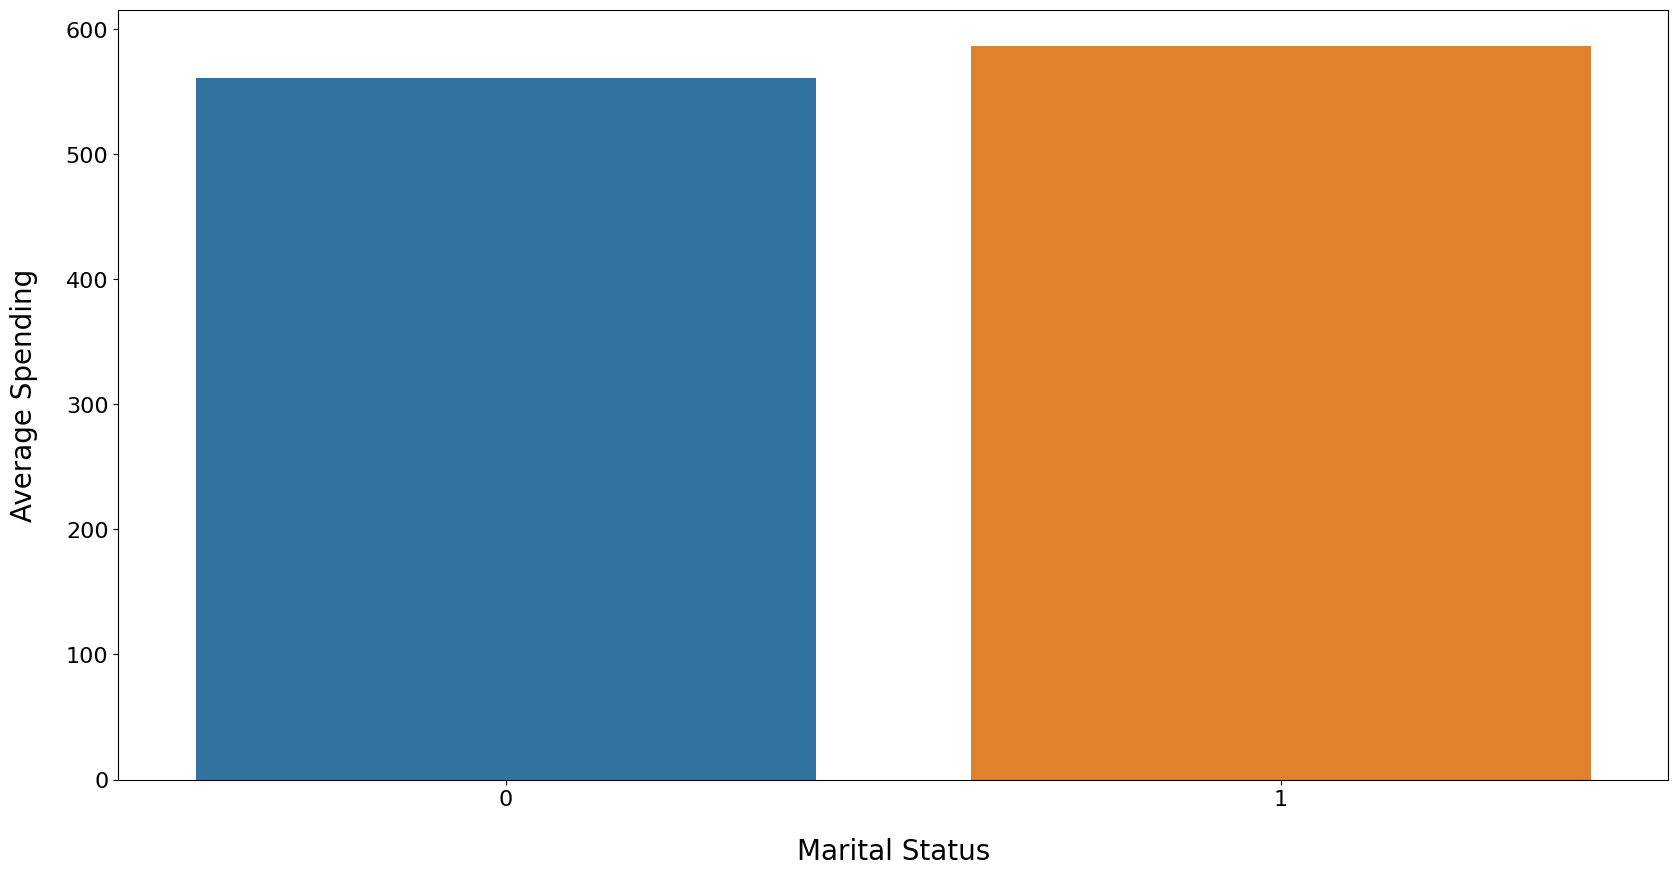

In [ ]:
# Average spending : Marital Status
maritalspending = df.groupby('Marital_Status')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
maritalspending_df = pd.DataFrame(list(maritalspending.items()), columns=['Marital Status', 'Average Spending'])

plt.figure(figsize=(20,10))
sns.barplot(data = maritalspending_df, x="Marital Status", y="Average Spending");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Marital Status', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);


In [ ]:
# Insights from the graphs
# The average spending of single people (0) is slightly lower than the average spending of not single people.

In [ ]:
# Education level
education = df.Education.value_counts()

fig = px.pie(education,
             values = education.values,
             names = education.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()


In [ ]:
# Insights from the graphs
# 0 (graduate stud): 50.5 %
# 1(post grad ): 38.1%
# 2 (under grad) : 11.4%
# Almost half of all customers have achieved a college degree. Only 11.4% of customers consist of people in college or without a college degree.

In [ ]:
# child status
children = df.Children.value_counts()

fig = px.pie(children,
             values = children.values,
             names = children.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label',
                  marker = dict(line = dict(color = 'white', width = 2)))
fig.show()

In [ ]:
# Insights from the graphs
# About 50% of customers have 1 child
# 28.5% = 0 child
# 18.8% = 2 children
# 2.26% = 3 children

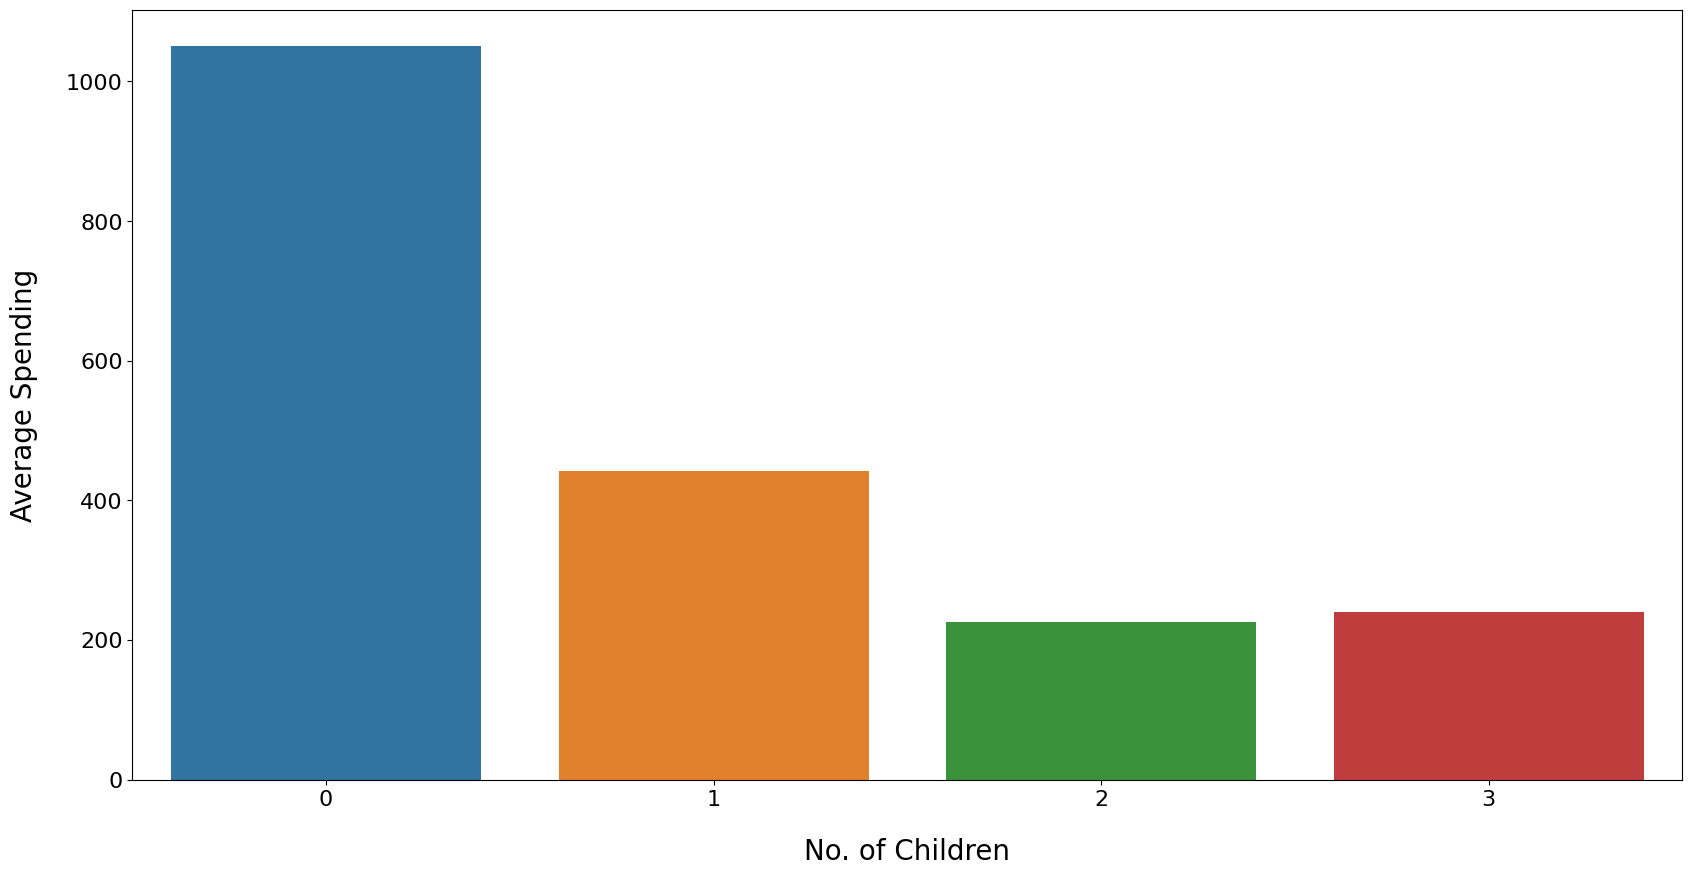

In [ ]:
childrenspending = df.groupby('Children')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
childrenspending_df = pd.DataFrame(list(childrenspending.items()), columns=['No. of Children', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data=childrenspending_df,  x="No. of Children", y="Average Spending");
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Children', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

In [ ]:
# Insights from the graphs
# People with no children are more likely to spend more money than people with 1, 2 or 3 children.

In [ ]:
# Categorize into age group
agegroup = df.AgeGroup.value_counts()

fig = px.pie(labels = agegroup.index, values = agegroup.values, names = agegroup.index, width = 550, height = 550)

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent + label',
                  hole = 0.75,
                  marker = dict(colors = ['#3D0C02', '#800000'  , '#C11B17','#C0C0C0'],
                                line = dict(color = 'white', width = 2)))

fig.update_layout(annotations = [dict(text = 'Age Groups',
                                      x = 0.5, y = 0.5, font_size = 36, showarrow = False,
                                      font_color = 'black')],
                  showlegend = False)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



In [ ]:
# The majority of customers consist of middle age to senior adults. More than 50% of customers are middle age adults.

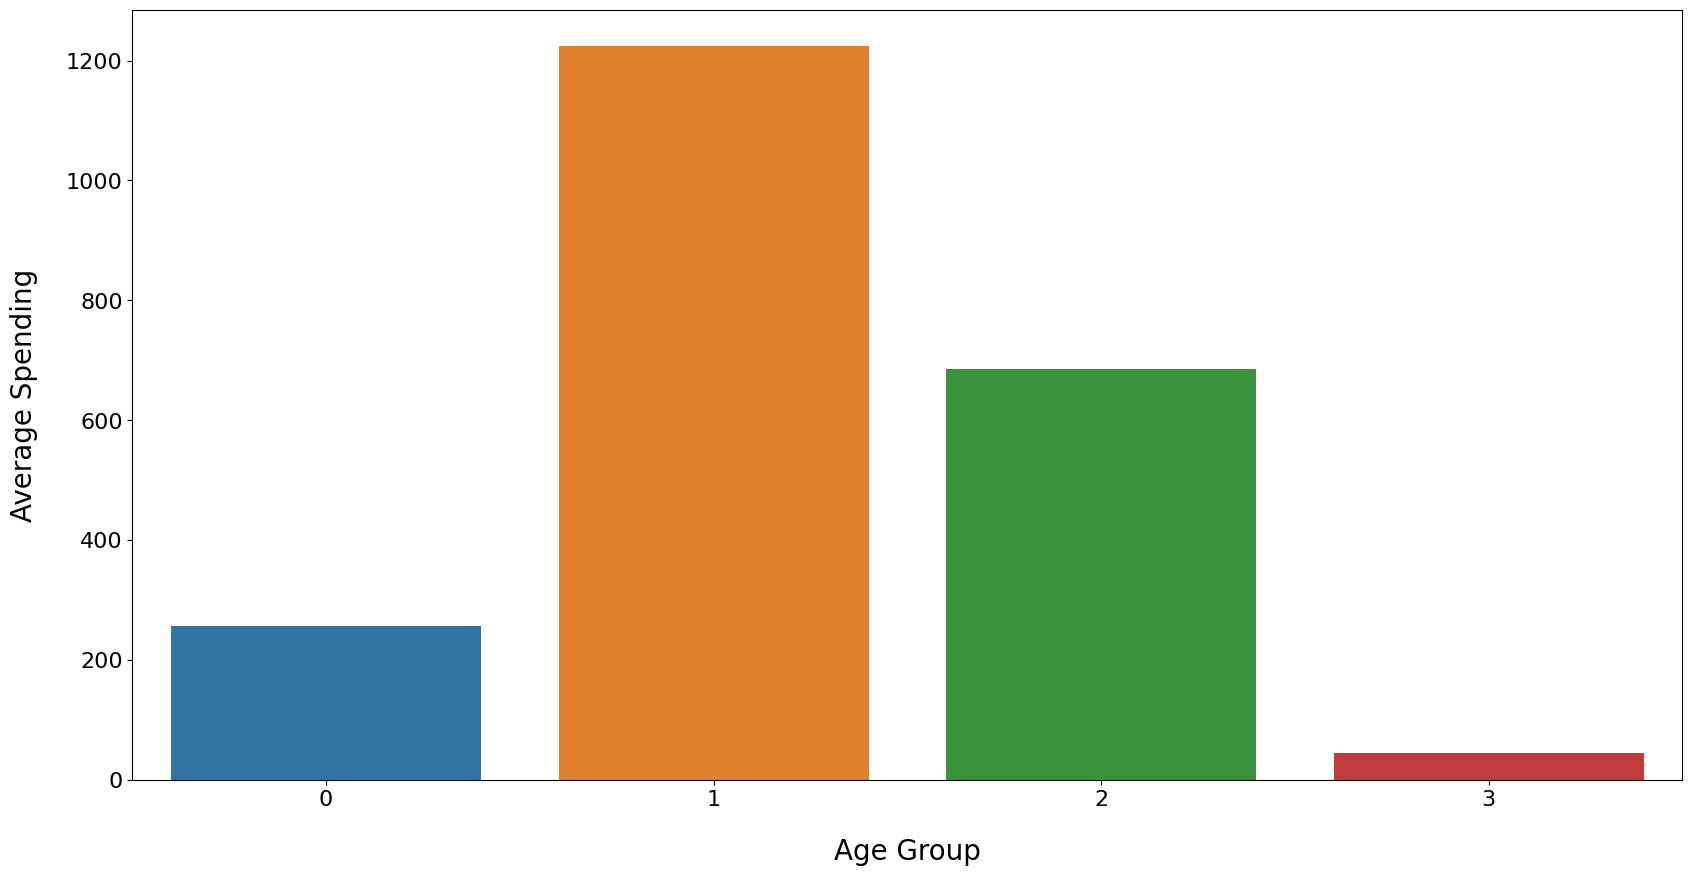

In [ ]:
# Average Spendings vs Age group
agegroupspending = df.groupby('AgeGroup')['Ave_Spend_on_products'].mean().sort_values(ascending=False)
agegroupspending_df = pd.DataFrame(list(agegroup.items()), columns=['Age Group', 'Average Spending'])

plt.figure(figsize=(20,10))

sns.barplot(data = agegroupspending_df, x="Age Group", y='Average Spending');
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Age Group', fontsize=20, labelpad=20)
plt.ylabel('Average Spending', fontsize=20, labelpad=20);

In [ ]:
# Insights from the graph
# Most average spending comes from the middle age and senior adults
# and followed by younger people or teens. The highest average spending is above 1200.

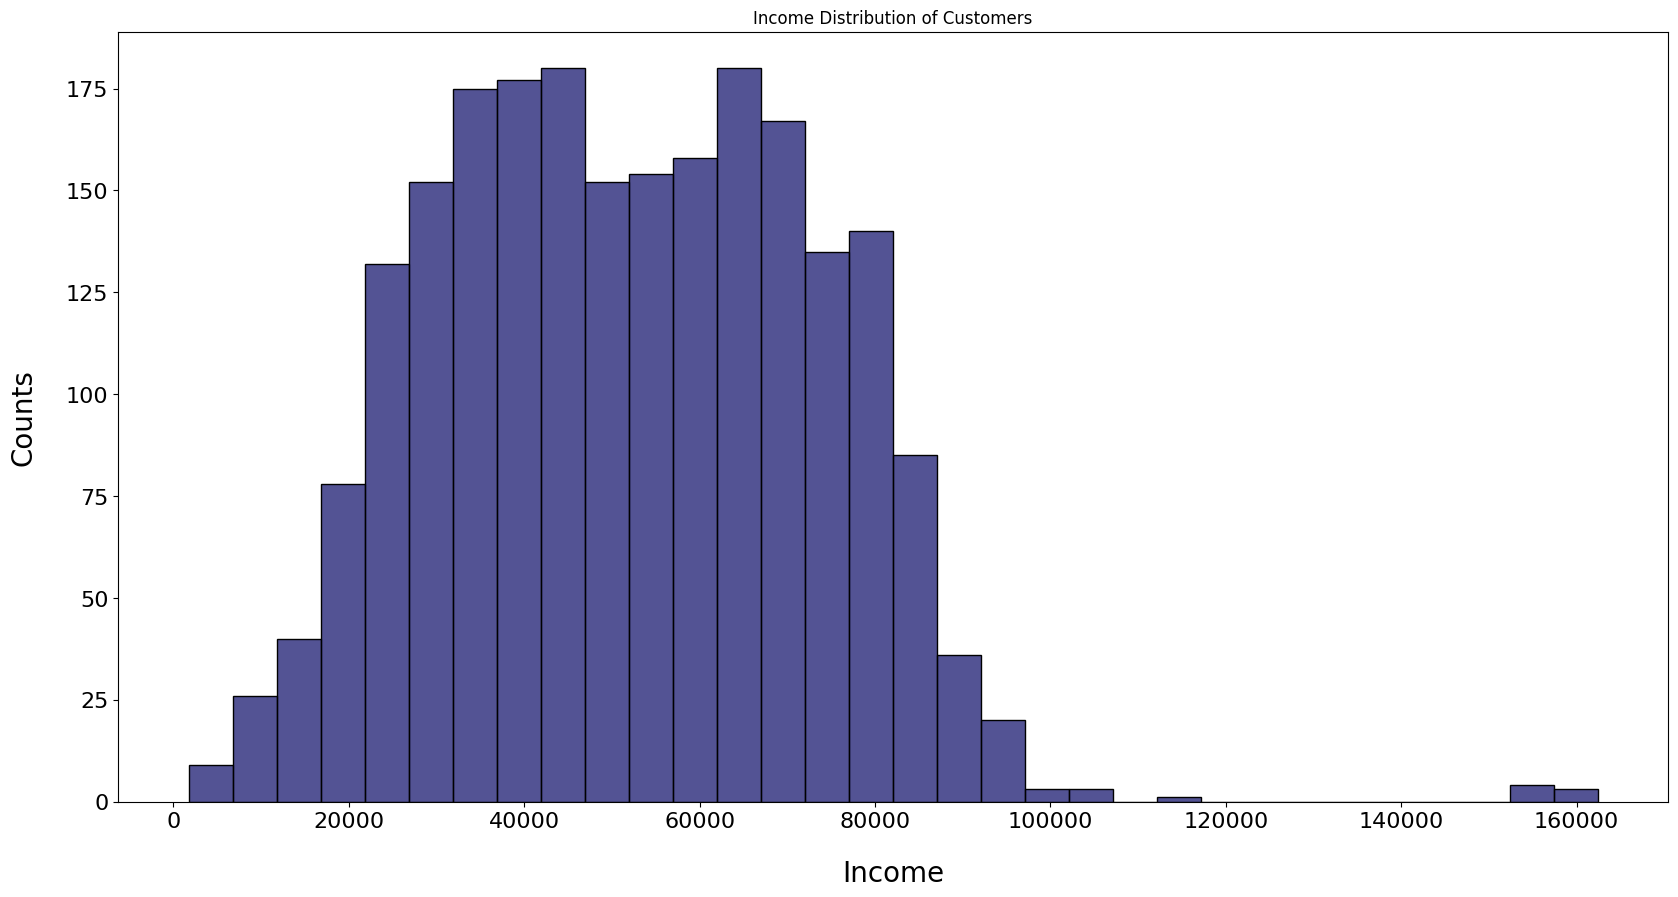

In [ ]:
# Income Distribution of Customer
plt.figure(figsize=(20, 10))
ax = sns.histplot(data = df.Income, color = "midnightblue")
ax.set(title = "Income Distribution of Customers");

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Counts', fontsize=20, labelpad=20);

In [ ]:
# Insights from the graphs
# there are outliers but the distibution with most most customers earinig between 25000 and 85000

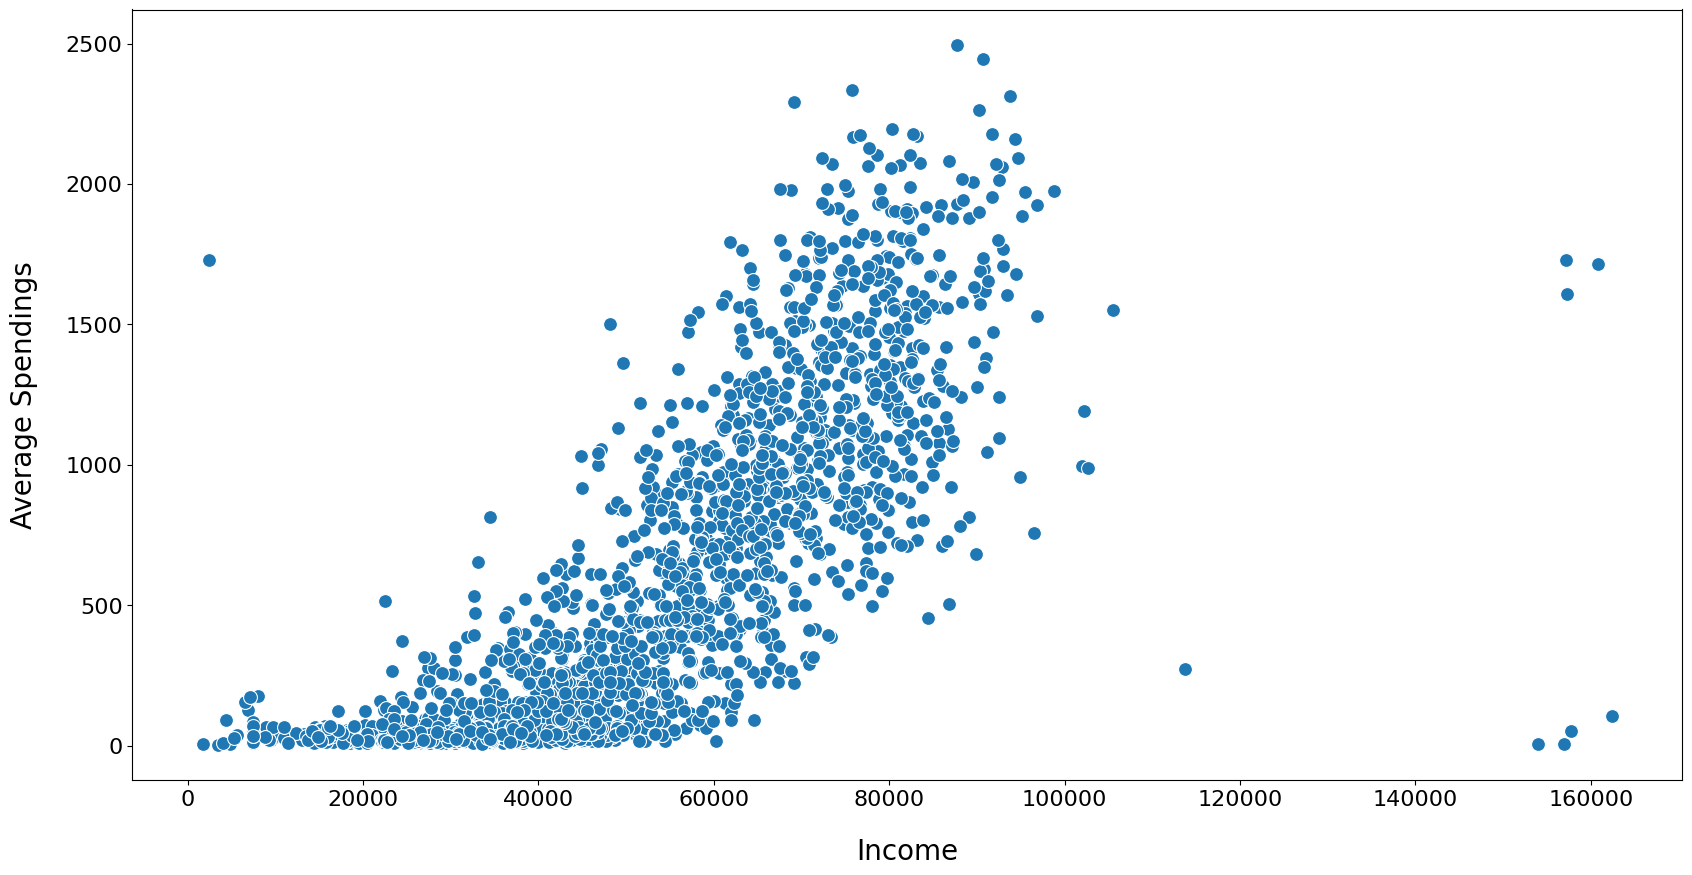

In [ ]:
# Income vs Spendings
plt.figure(figsize=(20,10))

sns.scatterplot(x= df.Income, y= df.Ave_Spend_on_products, s=100);

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Income', fontsize=20, labelpad=20)
plt.ylabel('Average Spendings', fontsize=20, labelpad=20);

In [ ]:
# Insights from the graphs
# The relationship between the average spendings and income has a strong linear relationship
# which indication a postive correlation and the more income of the customers the more they tend
# to spend more money on the products in this company.